In [78]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import calplot
import numpy as np
import scipy.stats as stats

In [2]:
# Take in all of our AQI data and read it into pandas
AQI_2018 = "Resources/daily_aqi_by_county_2018.csv"
AQI_2019 = "Resources/daily_aqi_by_county_2019.csv"
AQI_2020 = "Resources/daily_aqi_by_county_2020.csv"
AQI_2021 = "Resources/daily_aqi_by_county_2021.csv"
AQI_2022 = "Resources/daily_aqi_by_county_2022.csv"
AQI_2023 = "Resources/daily_aqi_by_county_2023.csv"
AQI_2018_df = pd.read_csv(AQI_2018)
AQI_2019_df = pd.read_csv(AQI_2019)
AQI_2020_df = pd.read_csv(AQI_2020)
AQI_2021_df = pd.read_csv(AQI_2021)
AQI_2022_df = pd.read_csv(AQI_2022)
AQI_2023_df = pd.read_csv(AQI_2023)
#change the date from object to proper date
AQI_2018_df['Date'] = pd.to_datetime(AQI_2018_df['Date'], format='%Y-%m-%d')
AQI_2019_df['Date'] = pd.to_datetime(AQI_2019_df['Date'], format='%Y-%m-%d')
AQI_2020_df['Date'] = pd.to_datetime(AQI_2020_df['Date'], format='%Y-%m-%d')
AQI_2021_df['Date'] = pd.to_datetime(AQI_2021_df['Date'], format='%Y-%m-%d')
AQI_2022_df['Date'] = pd.to_datetime(AQI_2022_df['Date'], format='%Y-%m-%d')
AQI_2023_df['Date'] = pd.to_datetime(AQI_2023_df['Date'], format='%Y-%m-%d')
#Groupby State
nj_2018_df = AQI_2018_df.loc[AQI_2018_df['State Name'] == 'New Jersey']
#nj_2018_df
nj_2019_df = AQI_2019_df.loc[AQI_2019_df['State Name'] == 'New Jersey']
#nj_2019_df
nj_2020_df = AQI_2020_df.loc[AQI_2020_df['State Name'] == 'New Jersey']
#nj_2020_df
nj_2021_df = AQI_2021_df.loc[AQI_2021_df['State Name'] == 'New Jersey']
#nj_2021_df
nj_2022_df = AQI_2022_df.loc[AQI_2022_df['State Name'] == 'New Jersey']
#nj_2022_df
nj_2023_df = AQI_2023_df.loc[AQI_2023_df['State Name'] == 'New Jersey']

# Merge the first two datasets on "COUNTRY OF NATIONALITY" so that no data is lost (should be 44 rows)
combined_NJ_2018_2019_df = pd.merge(nj_2018_df, nj_2019_df,
                                 how='outer', on='county Name')
combined_NJ_2018_2019_df

,State Name_x,county Name,State Code_x,County Code_x,Date_x,AQI_x,Category_x,Defining Parameter_x,Defining Site_x,Number of Sites Reporting_x,State Name_y,State Code_y,County Code_y,Date_y,AQI_y,Category_y,Defining Parameter_y,Defining Site_y,Number of Sites Reporting_y
0,New Jersey,Atlantic,34,1,2018-01-01,34,Good,Ozone,34-001-0006,1,New Jersey,34,1,2019-01-01,27,Good,PM2.5,34-001-0006,1
1,New Jersey,Atlantic,34,1,2018-01-01,34,Good,Ozone,34-001-0006,1,New Jersey,34,1,2019-01-02,25,Good,Ozone,34-001-0006,1
2,New Jersey,Atlantic,34,1,2018-01-01,34,Good,Ozone,34-001-0006,1,New Jersey,34,1,2019-01-03,22,Good,Ozone,34-001-0006,2
3,New Jersey,Atlantic,34,1,2018-01-01,34,Good,Ozone,34-001-0006,1,New Jersey,34,1,2019-01-04,30,Good,PM2.5,34-001-0006,1
4,New Jersey,Atlantic,34,1,2018-01-01,34,Good,Ozone,34-001-0006,1,New Jersey,34,1,2019-01-05,25,Good,Ozone,34-001-0006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920942,New Jersey,Warren,34,41,2018-12-31,20,Good,NO2,34-041-0007,1,New Jersey,34,41,2019-12-27,59,Moderate,PM2.5,34-041-0007,1
1920943,New Jersey,Warren,34,41,2018-12-31,20,Good,NO2,34-041-0007,1,New Jersey,34,41,2019-12-28,56,Moderate,PM2.5,34-041-0007,1
1920944,New Jersey,Warren,34,41,2018-12-31,20,Good,NO2,34-041-0007,1,New Jersey,34,41,2019-12-29,63,Moderate,PM2.5,34-041-0007,1
1920945,New Jersey,Warren,34,41,2018-12-31,20,Good,NO2,34-041-0007,1,New Jersey,34,41,2019-12-30,19,Good,Ozone,34-041-0007,1


In [3]:
AQI_2023_df.dtypes

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object

In [4]:
nj_2023_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
98856,New Jersey,Atlantic,34,1,2023-01-01,25,Good,Ozone,34-001-0006,1
98857,New Jersey,Atlantic,34,1,2023-01-02,43,Good,PM2.5,34-001-0006,1
98858,New Jersey,Atlantic,34,1,2023-01-03,50,Good,PM2.5,34-001-0006,1
98859,New Jersey,Atlantic,34,1,2023-01-04,32,Good,PM2.5,34-001-0006,1
98860,New Jersey,Atlantic,34,1,2023-01-05,18,Good,Ozone,34-001-0006,1


In [5]:
nj_2023_df.dtypes

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object

In [6]:
bergen_2018 = nj_2018_df.loc[nj_2018_df['county Name'] == 'Bergen',:]


In [7]:
nj_2019_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
172477,New Jersey,Atlantic,34,1,2019-01-01,27,Good,PM2.5,34-001-0006,1
172478,New Jersey,Atlantic,34,1,2019-01-02,25,Good,Ozone,34-001-0006,1
172479,New Jersey,Atlantic,34,1,2019-01-03,22,Good,Ozone,34-001-0006,2
172480,New Jersey,Atlantic,34,1,2019-01-04,30,Good,PM2.5,34-001-0006,1
172481,New Jersey,Atlantic,34,1,2019-01-05,25,Good,Ozone,34-001-0006,1


In [8]:
# Created grouped data
nj_2018_grouped = nj_2018_df.groupby('county Name')
nj_2019_grouped = nj_2019_df.groupby('county Name')
nj_2020_grouped = nj_2020_df.groupby('county Name')
nj_2021_grouped = nj_2021_df.groupby('county Name')
nj_2022_grouped = nj_2022_df.groupby('county Name')
nj_2023_grouped = nj_2023_df.groupby('county Name')

In [9]:
maxes_2018 = nj_2018_grouped['AQI'].max()
maxes_2019 = nj_2019_grouped['AQI'].max()
maxes_2020 = nj_2020_grouped['AQI'].max()
maxes_2021 = nj_2021_grouped['AQI'].max()
maxes_2022 = nj_2022_grouped['AQI'].max()
maxes_2023 = nj_2023_grouped['AQI'].max()

In [10]:
nj_2018_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
174456,New Jersey,Atlantic,34,1,2018-01-01,34,Good,Ozone,34-001-0006,1
174457,New Jersey,Atlantic,34,1,2018-01-02,38,Good,PM2.5,34-001-0006,2
174458,New Jersey,Atlantic,34,1,2018-01-03,38,Good,PM2.5,34-001-0006,1
174459,New Jersey,Atlantic,34,1,2018-01-04,33,Good,Ozone,34-001-0006,1
174460,New Jersey,Atlantic,34,1,2018-01-05,33,Good,Ozone,34-001-0006,2


In [11]:
maxes_2018

county Name
Atlantic      112
Bergen        164
Camden        140
Cumberland     93
Essex         177
Gloucester    147
Hudson        174
Hunterdon     179
Mercer        187
Middlesex     133
Monmouth      100
Morris        136
Ocean         143
Passaic       150
Union          95
Warren        112
Name: AQI, dtype: int64

In [12]:
max_date_2018 = []
#max_year = []
county_max_2018 = []
max_value_2018 = []
def_parameter_2018 = []
names_maxes_2018 = [i for i in maxes_2018.index]
for index, row in nj_2018_df.iterrows():
    for name in names_maxes_2018:
        if row['county Name'] == name:
            if row['AQI'] == maxes_2018[f'{name}']:
                max_date_2018.append(row['Date'])
                county_max_2018.append(row['county Name'])
                max_value_2018.append(row['AQI'])
                #max_year.append(row['Year'])
                def_parameter_2018.append(row['Defining Parameter'])
new_maxes_2018 = {'Date_2018':[date for date in max_date_2018], 'County':[county for county in county_max_2018], 'AQI_2018': [value for value in max_value_2018], 
             'Defining Parameter_2018': [param for param in def_parameter_2018]}
                  #'Year_2018' : [year for year in max_year]}
maxes_2018_df = pd.DataFrame(new_maxes_2018)
maxes_2018_df.head()

,Date_2018,County,AQI_2018,Defining Parameter_2018
0,2018-05-01,Atlantic,112,Ozone
1,2018-07-02,Bergen,164,Ozone
2,2018-07-10,Camden,140,Ozone
3,2018-07-10,Cumberland,93,Ozone
4,2018-07-02,Essex,177,Ozone


In [13]:
max_date_2019 = []
#max_year = []
county_max_2019 = []
max_value_2019 = []
def_parameter_2019 = []
names_maxes_2019 = [i for i in maxes_2019.index]
for index, row in nj_2019_df.iterrows():
    for name in names_maxes_2019:
        if row['county Name'] == name:
            if row['AQI'] == maxes_2019[f'{name}']:
                max_date_2019.append(row['Date'])
                county_max_2019.append(row['county Name'])
                max_value_2019.append(row['AQI'])
                #max_year.append(row['Year'])
                def_parameter_2019.append(row['Defining Parameter'])
new_maxes_2019 = {'Date_2019':[date for date in max_date_2019], 'County':[county for county in county_max_2019], 'AQI_2019': [value for value in max_value_2019], 
             'Defining Parameter_2019': [param for param in def_parameter_2019]}
                  #'Year_2019' : [year for year in max_year]}
maxes_2019_df = pd.DataFrame(new_maxes_2019)
maxes_2019_df

,Date_2019,County,AQI_2019,Defining Parameter_2019
0,2019-06-28,Atlantic,105,Ozone
1,2019-06-28,Bergen,150,Ozone
2,2019-07-02,Camden,126,Ozone
3,2019-06-27,Cumberland,105,Ozone
4,2019-07-02,Cumberland,105,Ozone
5,2019-06-28,Essex,100,Ozone
6,2019-07-02,Gloucester,133,Ozone
7,2019-11-26,Hudson,92,PM2.5
8,2019-06-28,Hunterdon,108,Ozone
9,2019-06-28,Mercer,136,Ozone


In [14]:
max_date_2020 = []
#max_year = []
county_max_2020 = []
max_value_2020 = []
def_parameter_2020 = []
names_maxes_2020 = [i for i in maxes_2020.index]
for index, row in nj_2020_df.iterrows():
    for name in names_maxes_2020:
        if row['county Name'] == name:
            if row['AQI'] == maxes_2020[f'{name}']:
                max_date_2020.append(row['Date'])
                county_max_2020.append(row['county Name'])
                max_value_2020.append(row['AQI'])
                #max_year.append(row['Year'])
                def_parameter_2020.append(row['Defining Parameter'])
new_maxes_2020 = {'Date_2020':[date for date in max_date_2020], 'County':[county for county in county_max_2020], 'AQI_2020': [value for value in max_value_2020], 
             'Defining Parameter_2020': [param for param in def_parameter_2020]}
                  #'Year_2020' : [year for year in max_year]}
maxes_2020_df = pd.DataFrame(new_maxes_2020)
maxes_2020_df

,Date_2020,County,AQI_2020,Defining Parameter_2020
0,2020-06-04,Atlantic,90,Ozone
1,2020-08-10,Bergen,119,Ozone
2,2020-07-21,Camden,87,Ozone
3,2020-07-30,Camden,87,Ozone
4,2020-06-03,Cumberland,71,Ozone
5,2020-06-26,Cumberland,71,Ozone
6,2020-07-20,Cumberland,71,Ozone
7,2020-12-12,Essex,127,PM2.5
8,2020-07-21,Gloucester,101,Ozone
9,2020-07-22,Hudson,90,Ozone


In [15]:
max_date_2021 = []
#max_year = []
county_max_2021 = []
max_value_2021 = []
def_parameter_2021 = []
names_maxes_2021 = [i for i in maxes_2021.index]
for index, row in nj_2021_df.iterrows():
    for name in names_maxes_2021:
        if row['county Name'] == name:
            if row['AQI'] == maxes_2021[f'{name}']:
                max_date_2021.append(row['Date'])
                county_max_2021.append(row['county Name'])
                max_value_2021.append(row['AQI'])
                #max_year.append(row['Year'])
                def_parameter_2021.append(row['Defining Parameter'])
new_maxes_2021 = {'Date_2021':[date for date in max_date_2021], 'County':[county for county in county_max_2021], 'AQI_2021': [value for value in max_value_2021], 
             'Defining Parameter_2021': [param for param in def_parameter_2021]}
                  #'Year_2021' : [year for year in max_year]}
maxes_2021_df = pd.DataFrame(new_maxes_2021)
maxes_2021_df

,Date_2021,County,AQI_2021,Defining Parameter_2021
0,2021-07-21,Atlantic,95,PM2.5
1,2021-08-26,Bergen,147,Ozone
2,2021-07-20,Camden,120,PM2.5
3,2021-05-19,Cumberland,112,Ozone
4,2021-07-20,Essex,125,PM2.5
5,2021-05-19,Gloucester,101,Ozone
6,2021-07-27,Gloucester,101,Ozone
7,2021-08-13,Hudson,126,Ozone
8,2021-06-18,Hunterdon,97,Ozone
9,2021-07-20,Mercer,130,PM2.5


In [16]:
max_date_2022 = []
#max_year = []
county_max_2022 = []
max_value_2022 = []
def_parameter_2022 = []
names_maxes_2022 = [i for i in maxes_2022.index]
for index, row in nj_2022_df.iterrows():
    for name in names_maxes_2022:
        if row['county Name'] == name:
            if row['AQI'] == maxes_2022[f'{name}']:
                max_date_2022.append(row['Date'])
                county_max_2022.append(row['county Name'])
                max_value_2022.append(row['AQI'])
                #max_year.append(row['Year'])
                def_parameter_2022.append(row['Defining Parameter'])
new_maxes_2022 = {'Date_2022':[date for date in max_date_2022], 'County':[county for county in county_max_2022], 'AQI_2022': [value for value in max_value_2022], 
             'Defining Parameter_2022': [param for param in def_parameter_2022]}
                  #'Year_2022' : [year for year in max_year]}
maxes_2022_df = pd.DataFrame(new_maxes_2022)
maxes_2022_df

,Date_2022,County,AQI_2022,Defining Parameter_2022
0,2022-06-20,Atlantic,176,PM2.5
1,2022-07-12,Bergen,90,Ozone
2,2022-06-30,Camden,108,Ozone
3,2022-06-30,Cumberland,84,Ozone
4,2022-07-20,Essex,97,Ozone
5,2022-06-30,Gloucester,126,Ozone
6,2022-07-20,Hudson,115,Ozone
7,2022-06-30,Hunterdon,93,Ozone
8,2022-07-20,Hunterdon,93,Ozone
9,2022-07-27,Mercer,119,Ozone


In [17]:
max_date_2023 = []
#max_year = []
county_max_2023 = []
max_value_2023 = []
def_parameter_2023 = []
names_maxes_2023 = [i for i in maxes_2023.index]
for index, row in nj_2023_df.iterrows():
    for name in names_maxes_2023:
        if row['county Name'] == name:
            if row['AQI'] == maxes_2023[f'{name}']:
                max_date_2023.append(row['Date'])
                county_max_2023.append(row['county Name'])
                max_value_2023.append(row['AQI'])
                #max_year.append(row['Year'])
                def_parameter_2023.append(row['Defining Parameter'])
new_maxes_2023 = {'Date_2023':[date for date in max_date_2023], 'County':[county for county in county_max_2023], 'AQI_2023': [value for value in max_value_2023], 
             'Defining Parameter_2023': [param for param in def_parameter_2023]}
                  #'Year_2023' : [year for year in max_year]}
maxes_2023_df = pd.DataFrame(new_maxes_2023)
maxes_2023_df

,Date_2023,County,AQI_2023,Defining Parameter_2023
0,2023-06-08,Atlantic,195,PM2.5
1,2023-06-07,Bergen,185,PM2.5
2,2023-06-07,Camden,193,PM2.5
3,2023-06-08,Cumberland,188,PM2.5
4,2023-06-08,Gloucester,176,PM2.5
5,2023-06-07,Hudson,188,PM2.5
6,2023-06-07,Hunterdon,237,PM2.5
7,2023-06-07,Mercer,220,PM2.5
8,2023-06-07,Middlesex,222,PM2.5
9,2023-04-13,Monmouth,100,Ozone


In [18]:
from functools import reduce
all_years_maxes = [maxes_2018_df, maxes_2019_df, maxes_2020_df, maxes_2021_df, maxes_2022_df, maxes_2023_df]

all_maxes_df = reduce(lambda  left,right: pd.merge(left,right,on=['County'],
                                            how='outer'), all_years_maxes)
all_maxes_df.head()

,Date_2018,County,AQI_2018,Defining Parameter_2018,Date_2019,AQI_2019,Defining Parameter_2019,Date_2020,AQI_2020,Defining Parameter_2020,Date_2021,AQI_2021,Defining Parameter_2021,Date_2022,AQI_2022,Defining Parameter_2022,Date_2023,AQI_2023,Defining Parameter_2023
0,2018-05-01,Atlantic,112,Ozone,2019-06-28,105,Ozone,2020-06-04,90,Ozone,2021-07-21,95,PM2.5,2022-06-20,176,PM2.5,2023-06-08,195.0,PM2.5
1,2018-07-02,Bergen,164,Ozone,2019-06-28,150,Ozone,2020-08-10,119,Ozone,2021-08-26,147,Ozone,2022-07-12,90,Ozone,2023-06-07,185.0,PM2.5
2,2018-07-10,Camden,140,Ozone,2019-07-02,126,Ozone,2020-07-21,87,Ozone,2021-07-20,120,PM2.5,2022-06-30,108,Ozone,2023-06-07,193.0,PM2.5
3,2018-07-10,Camden,140,Ozone,2019-07-02,126,Ozone,2020-07-30,87,Ozone,2021-07-20,120,PM2.5,2022-06-30,108,Ozone,2023-06-07,193.0,PM2.5
4,2018-07-10,Cumberland,93,Ozone,2019-06-27,105,Ozone,2020-06-03,71,Ozone,2021-05-19,112,Ozone,2022-06-30,84,Ozone,2023-06-08,188.0,PM2.5


In [19]:
all_maxes_df = all_maxes_df.drop_duplicates(subset=['County'])

In [20]:
all_maxes_df.head()

,Date_2018,County,AQI_2018,Defining Parameter_2018,Date_2019,AQI_2019,Defining Parameter_2019,Date_2020,AQI_2020,Defining Parameter_2020,Date_2021,AQI_2021,Defining Parameter_2021,Date_2022,AQI_2022,Defining Parameter_2022,Date_2023,AQI_2023,Defining Parameter_2023
0,2018-05-01,Atlantic,112,Ozone,2019-06-28,105,Ozone,2020-06-04,90,Ozone,2021-07-21,95,PM2.5,2022-06-20,176,PM2.5,2023-06-08,195.0,PM2.5
1,2018-07-02,Bergen,164,Ozone,2019-06-28,150,Ozone,2020-08-10,119,Ozone,2021-08-26,147,Ozone,2022-07-12,90,Ozone,2023-06-07,185.0,PM2.5
2,2018-07-10,Camden,140,Ozone,2019-07-02,126,Ozone,2020-07-21,87,Ozone,2021-07-20,120,PM2.5,2022-06-30,108,Ozone,2023-06-07,193.0,PM2.5
4,2018-07-10,Cumberland,93,Ozone,2019-06-27,105,Ozone,2020-06-03,71,Ozone,2021-05-19,112,Ozone,2022-06-30,84,Ozone,2023-06-08,188.0,PM2.5
10,2018-07-02,Essex,177,Ozone,2019-06-28,100,Ozone,2020-12-12,127,PM2.5,2021-07-20,125,PM2.5,2022-07-20,97,Ozone,NaT,NaN,NaN


In [21]:
import matplotlib.colors

In [22]:
def mulitplot_Max():
    width = 0.3
    names = all_maxes_df['County'].unique()
    list_names = [name for name in names]
    ind = np.arange(all_maxes_df['County'].nunique())
    
    fig = plt.figure(figsize=(24, 20))
    colors = np.random.rand(len(ind),3)
    
    
    plt.subplot(3, 2, 1)
    plt.bar( ind, all_maxes_df['AQI_2018'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2018')
    
    plt.subplot(3, 2, 2)
    plt.bar(ind, all_maxes_df['AQI_2019'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2019')
    
    plt.subplot(3, 2, 3)
    plt.bar(ind, all_maxes_df['AQI_2020'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2020')
    
    plt.subplot(3, 2, 4)
    plt.bar(ind, all_maxes_df['AQI_2021'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2021')
    
    plt.subplot(3, 2, 5)
    plt.bar(ind , all_maxes_df['AQI_2022'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2022')
    
    plt.subplot(3, 2, 6)
    plt.bar(ind , all_maxes_df['AQI_2023'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('Min AQI by county in 2023')
    
    plt.savefig('Multiplot_min.png')
    plt.show()
    

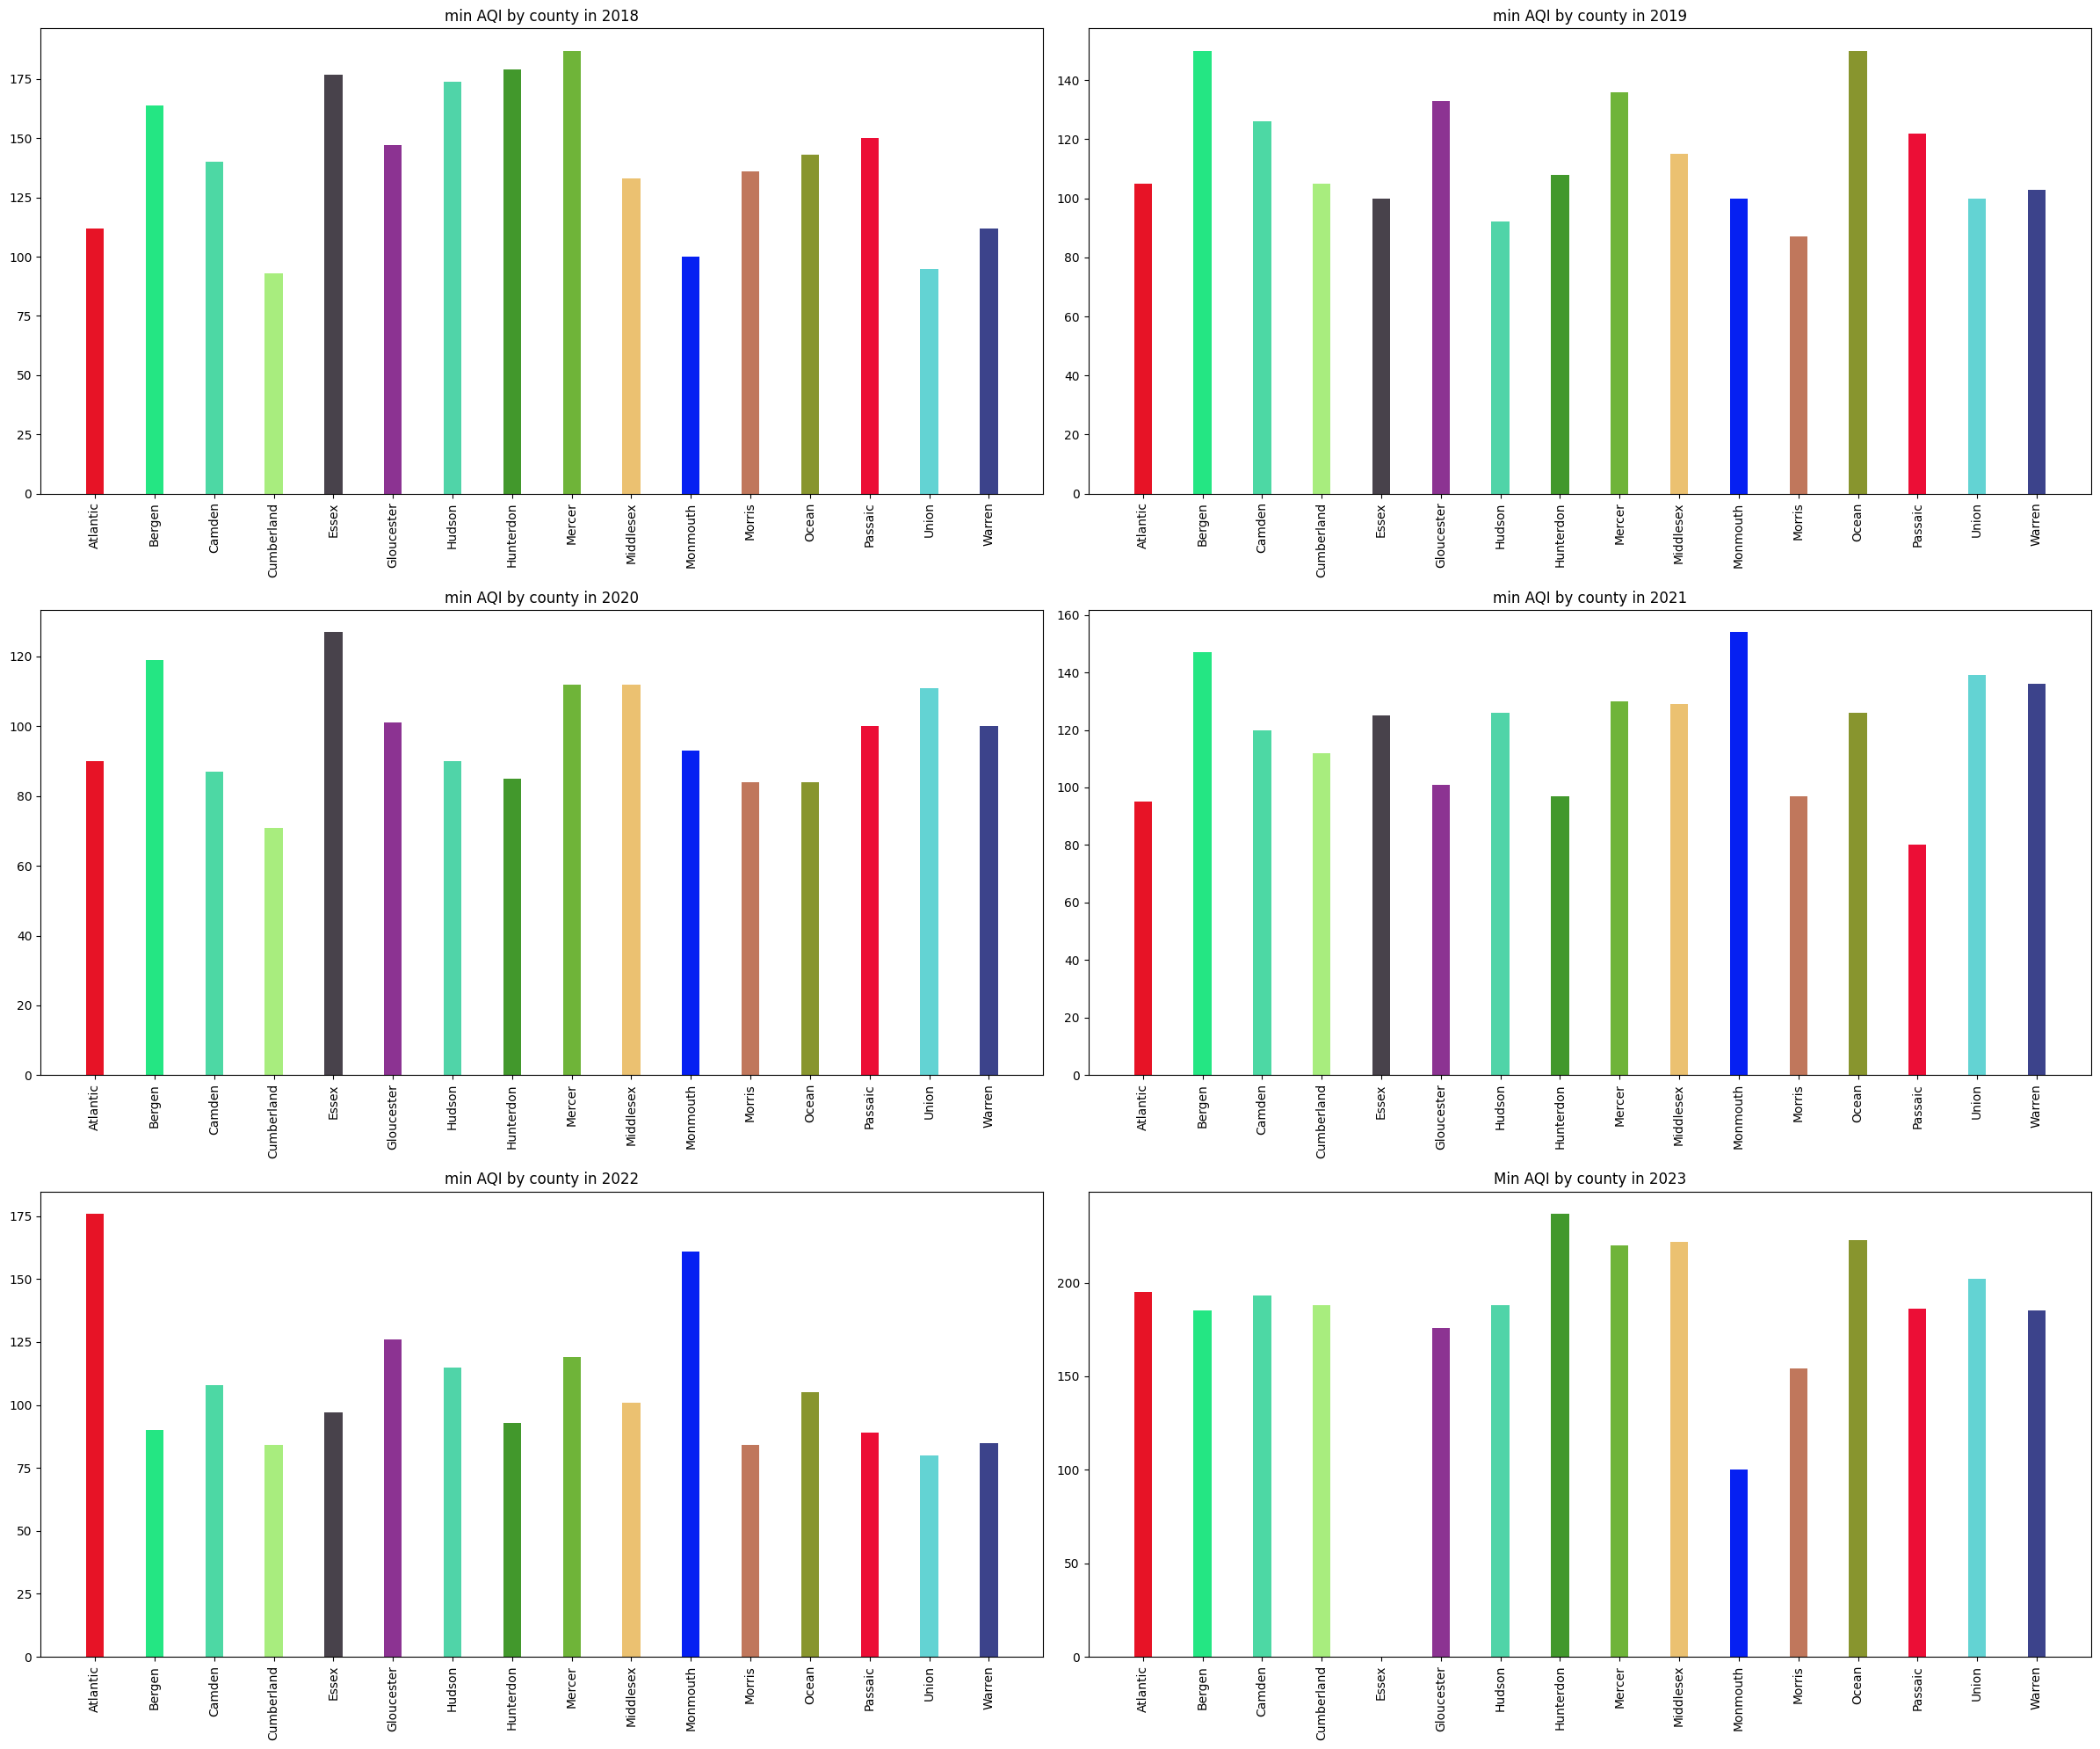

In [23]:
mulitplot_Max()

In [24]:
maxes_2018_df.head()

,Date_2018,County,AQI_2018,Defining Parameter_2018
0,2018-05-01,Atlantic,112,Ozone
1,2018-07-02,Bergen,164,Ozone
2,2018-07-10,Camden,140,Ozone
3,2018-07-10,Cumberland,93,Ozone
4,2018-07-02,Essex,177,Ozone


In [25]:
def max_Param():

    fig = plt.figure(figsize=(16, 12))
    #colors = np.random.rand(len(ind),3)
    
    plt.subplot(3, 2, 1)
    x_axis = maxes_2018_df['Defining Parameter_2018'].unique()
    list_names = [name for name in x_axis]
    #ind = np.arange(maxes_2018_df['County'].nunique())
    y_axis = maxes_2018_df['Defining Parameter_2018'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced max AQI by county in 2018')
    
    plt.subplot(3, 2, 2)
    x_axis = maxes_2019_df['Defining Parameter_2019'].unique()
    list_names = [name for name in x_axis]
    #ind = np.arange(maxes_2019_df['County'].nunique())
    y_axis = maxes_2019_df['Defining Parameter_2019'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced max AQI by county in 2019')
    
    plt.subplot(3, 2, 3)
    x_axis = maxes_2020_df['Defining Parameter_2020'].unique()
    list_names = [name for name in x_axis]
    #ind = np.arange(maxes_2020_df['County'].nunique())
    y_axis = maxes_2020_df['Defining Parameter_2020'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced max AQI by county in 2020')
    
    plt.subplot(3, 2, 4)
    x_axis = maxes_2021_df['Defining Parameter_2021'].unique()
    list_names = [name for name in x_axis]
    #ind = np.arange(maxes_2021_df['County'].nunique())
    y_axis = maxes_2021_df['Defining Parameter_2021'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced max AQI by county in 2021')
    
    plt.subplot(3, 2, 5)
    x_axis = maxes_2022_df['Defining Parameter_2022'].unique()
    list_names = [name for name in x_axis]
    #ind = np.arange(maxes_2022_df['County'].nunique())
    y_axis = maxes_2022_df['Defining Parameter_2022'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced max AQI by county in 2022')
    
    plt.subplot(3, 2, 6)
    x_axis = maxes_2023_df['Defining Parameter_2023'].unique()
    list_names = [name for name in x_axis]
    #ind = np.arange(maxes_2023_df['County'].nunique())
    y_axis = maxes_2023_df['Defining Parameter_2023'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced max AQI by county in 2023')

C:\Users\ambmd\AppData\Local\Temp\ipykernel_24732\592187550.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center',
C:\Users\ambmd\AppData\Local\Temp\ipykernel_24732\592187550.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center',
C:\Users\ambmd\AppData\Local\Temp\ipykernel_24732\592187550.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

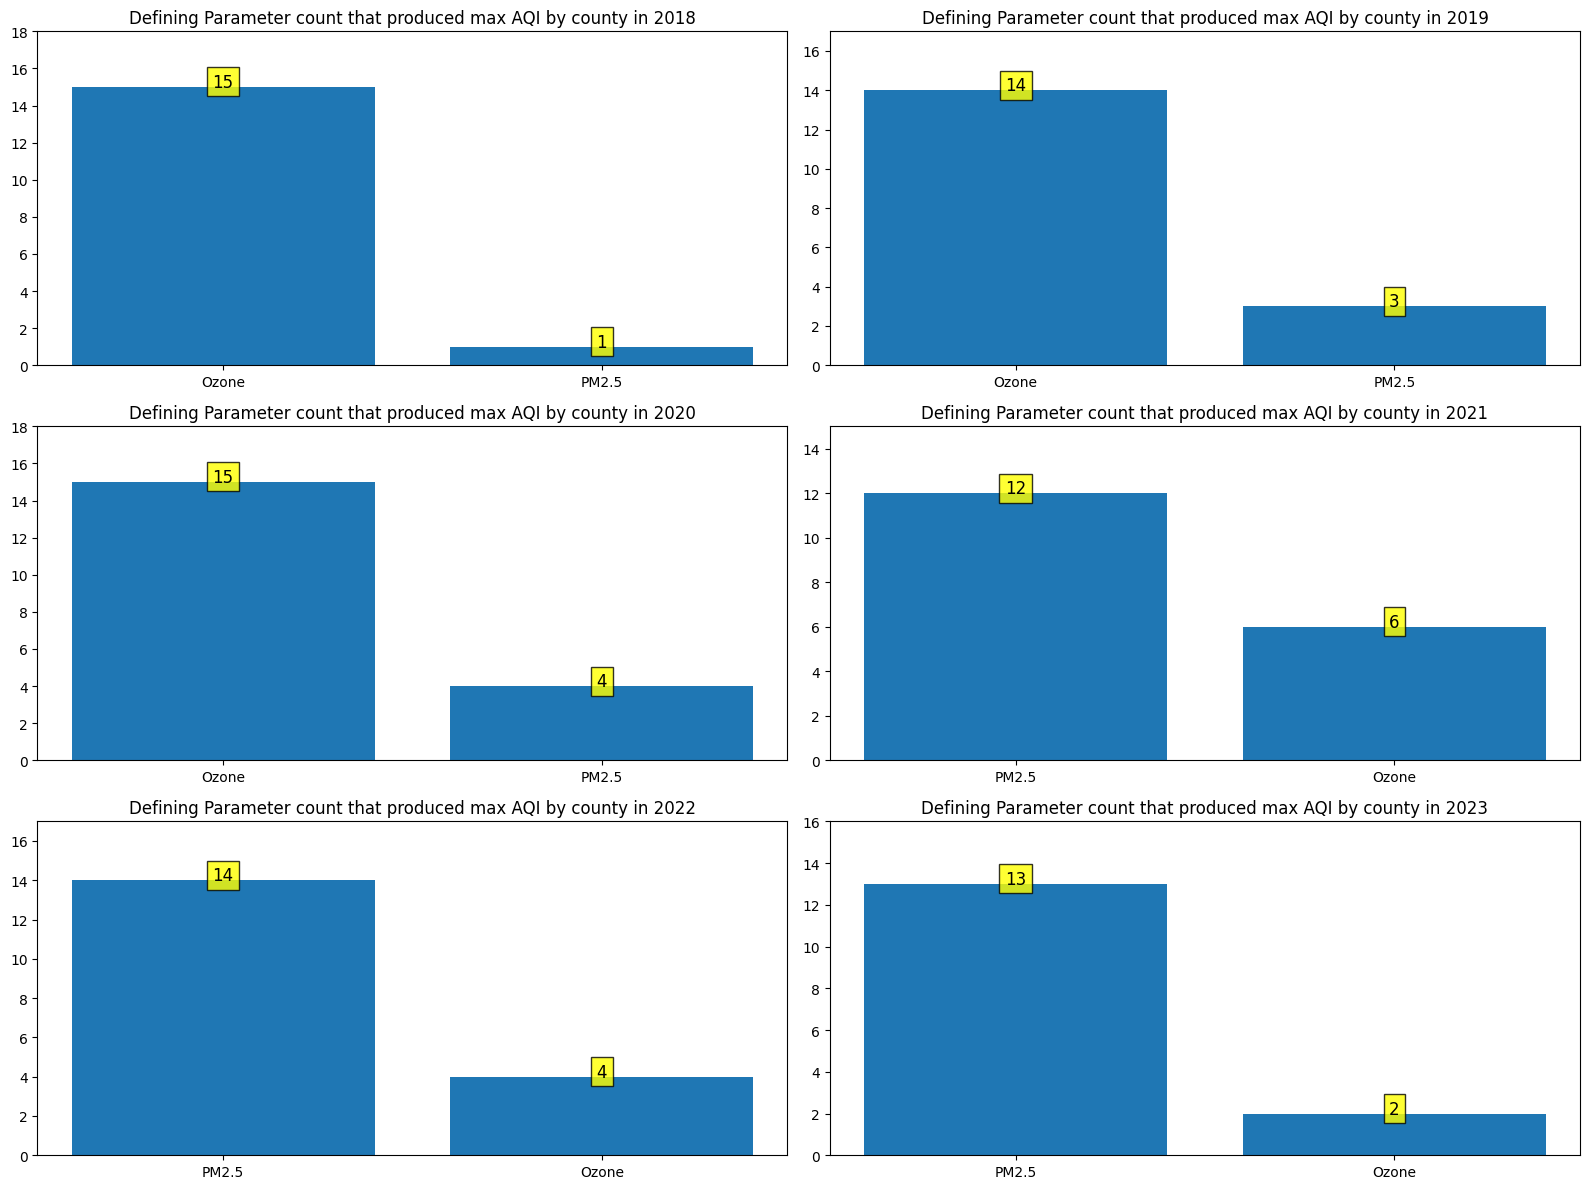

In [26]:
max_Param()

In [27]:
def stacked_Max():
        
    county_names = all_maxes_df['County'].unique()
    counties = [name for name in county_names]
    maxes_per_county = {'2018':all_maxes_df['AQI_2018'], '2019':all_maxes_df['AQI_2019'], '2020':all_maxes_df['AQI_2020'],
                        '2021':all_maxes_df['AQI_2021'], '2022':all_maxes_df['AQI_2022'], '2023':all_maxes_df['AQI_2023']}
    width = 0.5
    
    fig, ax = plt.subplots(figsize=(16,8))
    bottom = np.zeros(16)
    
    for boolean, max in maxes_per_county.items():
        ax.bar(counties, max, width, label=boolean, bottom=bottom)
        bottom += max
    # Let's put the annotations inside the bars themselves by using a
    # negative offset.
    y_offset = -15
    for bar in ax.patches:
      try:
        ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          round(bar.get_height()),
          ha='center',
          color='w',
          weight='bold',
          size=10
      )
      except ValueError:
          ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, 0)
    
    plt.title("Stacked Bar Graph of counties max AQI by year", fontsize=16)
    ax.legend(loc="upper right")
    plt.xlabel('Counties')
    plt.ylabel('AQI')
    plt.tight_layout()
    plt.xticks(rotation = 45, fontsize=14, ha='right', wrap=True)
    plt.savefig('stackedBar_max.png',dpi=300, bbox_inches = "tight")
    plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


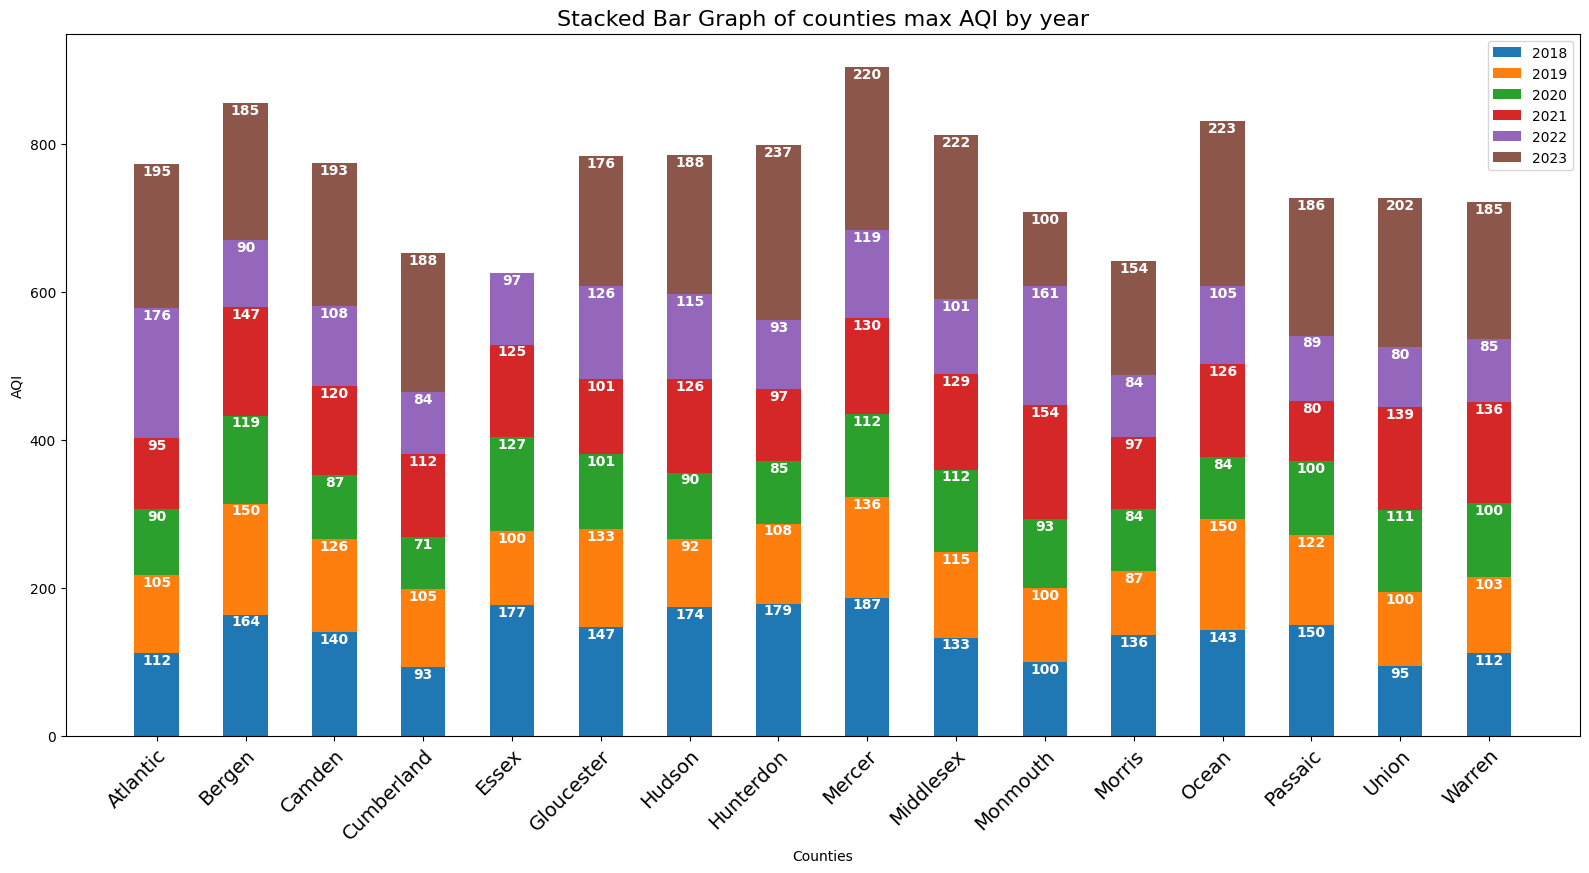

In [28]:
stacked_Max()

In [29]:
def Max_bar():
    
    width = 0.1
    names = all_maxes_df['County'].unique()
    list_names = [name for name in names]
    ind = np.arange(all_maxes_df['County'].nunique())
    
    
    plt.figure(figsize=(24, 18))
    plt.bar(ind - width*4, all_maxes_df['AQI_2018'], width)
    plt.bar(ind - width*3, all_maxes_df['AQI_2019'], width)
    plt.bar(ind - width*2, all_maxes_df['AQI_2020'], width)
    plt.bar(ind - width, all_maxes_df['AQI_2021'], width)
    plt.bar(ind , all_maxes_df['AQI_2022'], width)
    plt.bar(ind+width, all_maxes_df['AQI_2023'], width)
    plt.tight_layout()
    plt.legend([2018, 2019, 2020, 2021, 2022, 2023])
    plt.xticks(ind-width*2, list_names)
    plt.title('Max AQI per county from 2018-2023')
    plt.savefig('sidebysideBar_max.png')
    plt.show()

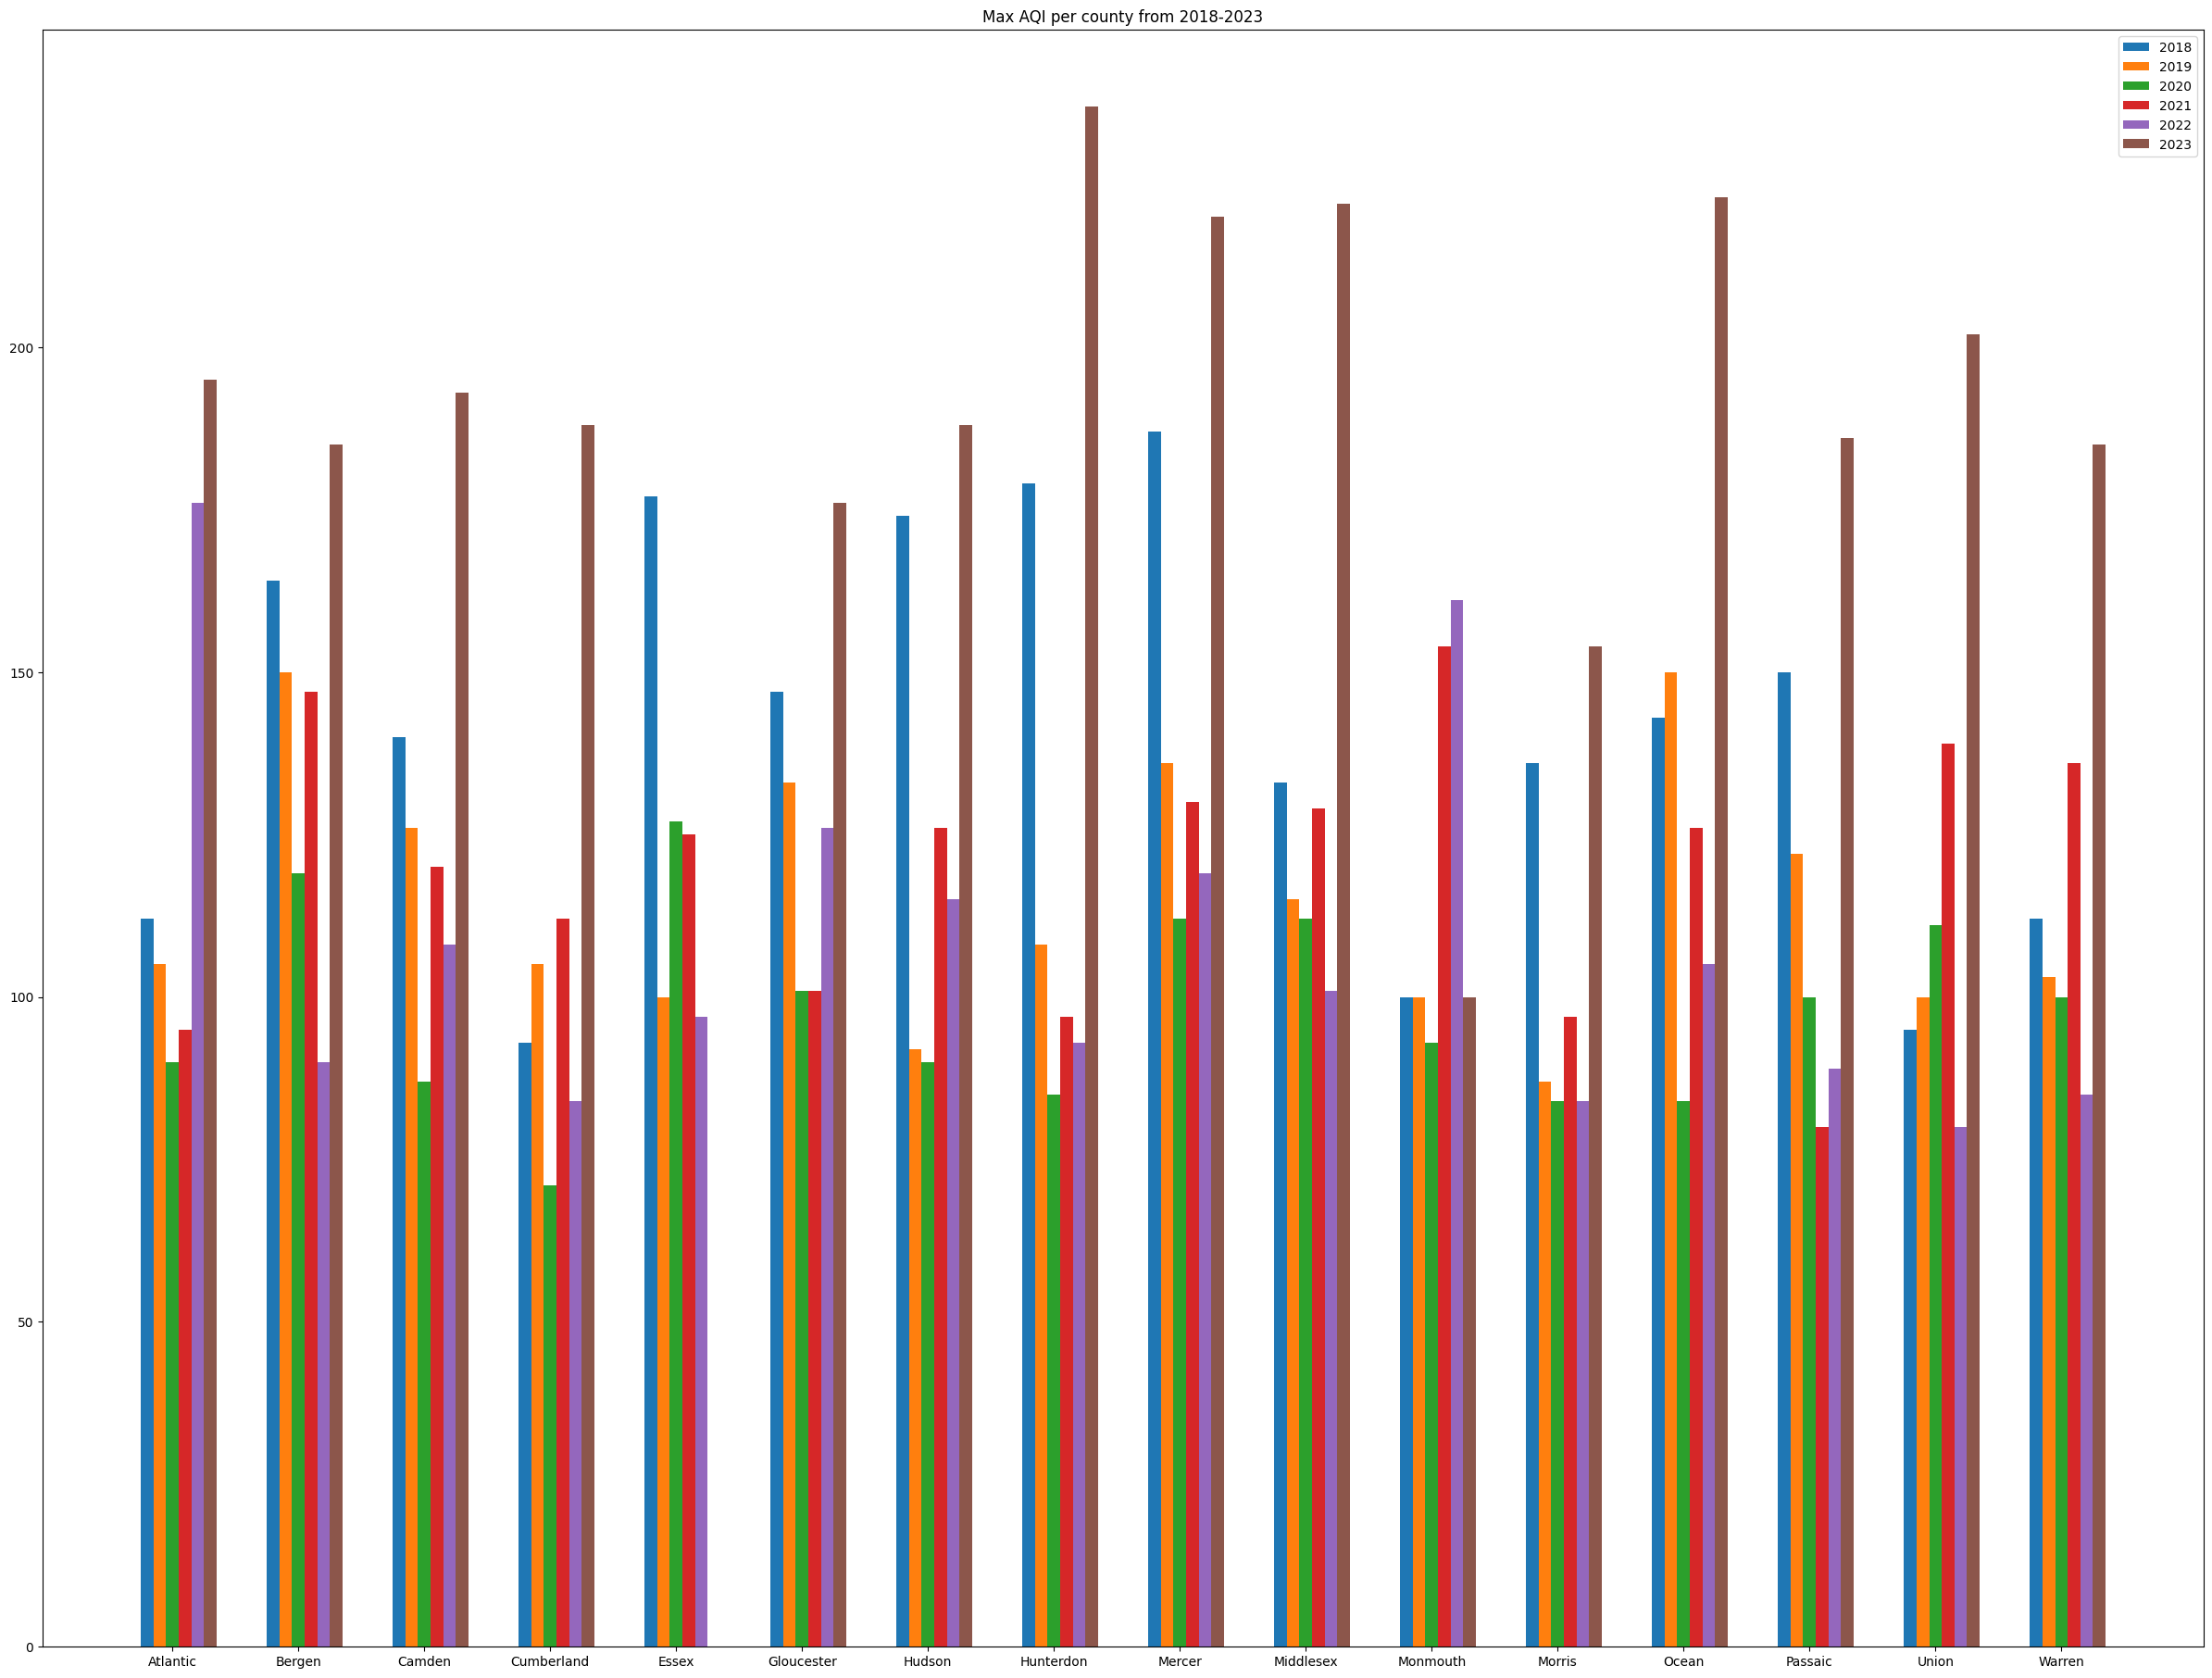

In [30]:
Max_bar()

In [31]:
bergen_2018 = nj_2018_df.loc[nj_2018_df['county Name'] == 'Bergen',:]
bergen_2019 = nj_2019_df.loc[nj_2019_df['county Name'] == 'Bergen',:]
bergen_2020 = nj_2020_df.loc[nj_2020_df['county Name'] == 'Bergen',:]
bergen_2021 = nj_2021_df.loc[nj_2021_df['county Name'] == 'Bergen',:]
bergen_2022 = nj_2022_df.loc[nj_2022_df['county Name'] == 'Bergen',:]
bergen_2023 = nj_2023_df.loc[nj_2023_df['county Name'] == 'Bergen',:]
all_years_bergen = [bergen_2018, bergen_2019, bergen_2020, bergen_2021, bergen_2022, bergen_2023]

#bergen_df = reduce(lambda  left,right: pd.merge(left,right,on=['']


In [32]:
bergen_df = pd.concat(all_years_bergen)
bergen_df

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
174821,New Jersey,Bergen,34,3,2018-01-01,21,Good,NO2,34-003-0010,1
174822,New Jersey,Bergen,34,3,2018-01-02,57,Moderate,NO2,34-003-0010,2
174823,New Jersey,Bergen,34,3,2018-01-03,107,Unhealthy for Sensitive Groups,NO2,34-003-0010,1
174824,New Jersey,Bergen,34,3,2018-01-04,38,Good,NO2,34-003-0010,1
174825,New Jersey,Bergen,34,3,2018-01-05,42,Good,NO2,34-003-0010,2
...,...,...,...,...,...,...,...,...,...,...
99214,New Jersey,Bergen,34,3,2023-06-27,45,Good,PM2.5,34-003-0010,2
99215,New Jersey,Bergen,34,3,2023-06-28,45,Good,PM2.5,34-003-0010,2
99216,New Jersey,Bergen,34,3,2023-06-29,92,Moderate,PM2.5,34-003-0010,2
99217,New Jersey,Bergen,34,3,2023-06-30,154,Unhealthy,Ozone,34-003-0006,2


In [33]:
bergen_df.dtypes

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object

In [34]:
bergen_df = bergen_df.set_index('Date')

In [35]:
def bergen_calplot():
    calplot.calplot(bergen_df['AQI'], cmap='Spectral_r')
    plt.title('2018-2023 Bergen county heatmap')
    plt.savefig('bergen_county.png',dpi=300, bbox_inches = "tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

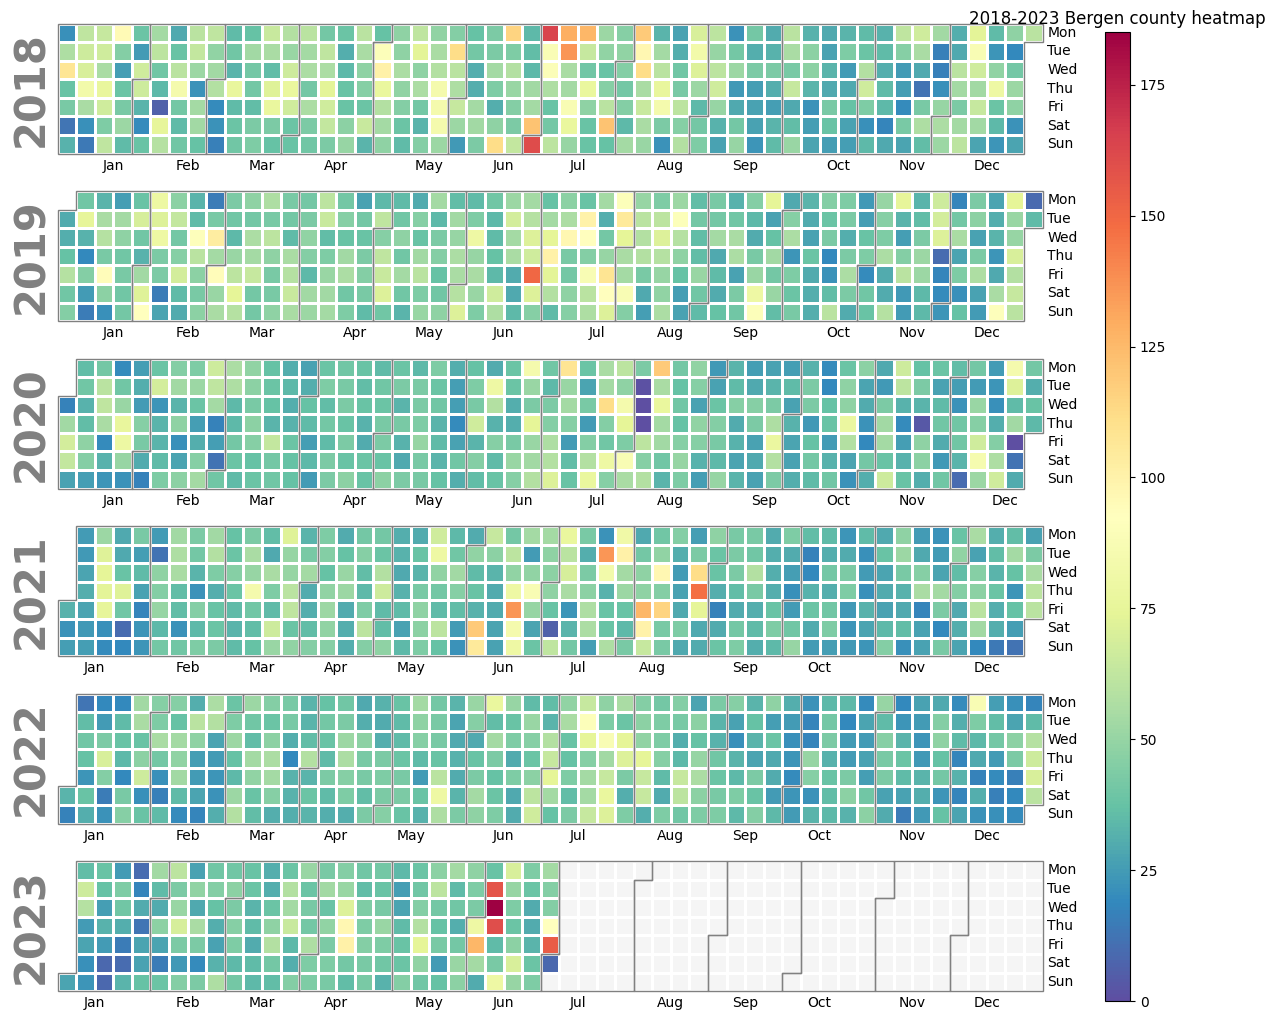

In [36]:
bergen_calplot()

In [37]:
all_nj = [nj_2018_df, nj_2019_df, nj_2020_df, nj_2021_df, nj_2022_df, nj_2023_df]
all_nj_df = pd.concat(all_nj)
all_nj_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
174456,New Jersey,Atlantic,34,1,2018-01-01,34,Good,Ozone,34-001-0006,1
174457,New Jersey,Atlantic,34,1,2018-01-02,38,Good,PM2.5,34-001-0006,2
174458,New Jersey,Atlantic,34,1,2018-01-03,38,Good,PM2.5,34-001-0006,1
174459,New Jersey,Atlantic,34,1,2018-01-04,33,Good,Ozone,34-001-0006,1
174460,New Jersey,Atlantic,34,1,2018-01-05,33,Good,Ozone,34-001-0006,2


In [38]:
mercer_df = all_nj_df.loc[all_nj_df['county Name'] == 'Mercer',:]
mercer_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
177273,New Jersey,Mercer,34,21,2018-01-01,33,Good,Ozone,34-021-0005,3
177274,New Jersey,Mercer,34,21,2018-01-02,48,Good,PM2.5,34-021-0005,3
177275,New Jersey,Mercer,34,21,2018-01-03,53,Moderate,PM2.5,34-021-0005,3
177276,New Jersey,Mercer,34,21,2018-01-04,31,Good,Ozone,34-021-9991,3
177277,New Jersey,Mercer,34,21,2018-01-05,32,Good,Ozone,34-021-9991,3


In [39]:
mercer_df.reset_index()
mercer_df.dtypes

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object

In [40]:
mercer_df = mercer_df.set_index('Date')

In [41]:
def mercer_calplot():
    calplot.calplot(mercer_df['AQI'], cmap='Spectral_r')
    plt.title('2018-2023 Mercer county heatmap')
    plt.savefig('mercer_county.png',dpi=300, bbox_inches = "tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

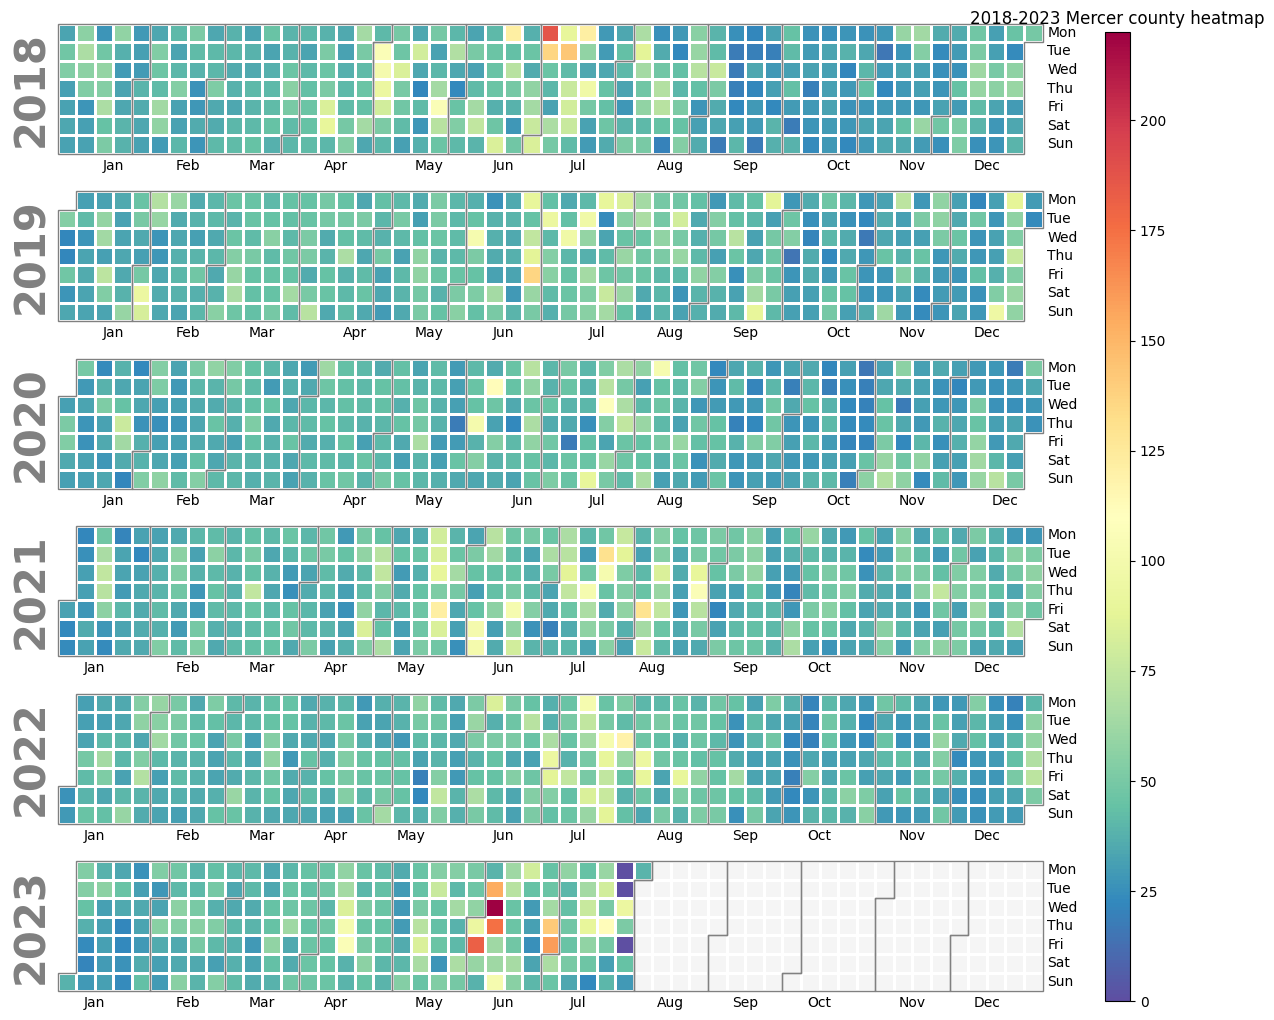

In [42]:
mercer_calplot()

In [43]:
all_nj_df['Defining Parameter'].unique()

array(['Ozone', 'PM2.5', 'NO2', 'CO', 'PM10'], dtype=object)

In [44]:
min_2018 = nj_2018_grouped['AQI'].min()
min_2019 = nj_2019_grouped['AQI'].min()
min_2020 = nj_2020_grouped['AQI'].min()
min_2021 = nj_2021_grouped['AQI'].min()
min_2022 = nj_2022_grouped['AQI'].min()
min_2023 = nj_2023_grouped['AQI'].min()

In [45]:
min_date_2018 = []
#min_year = []
county_min_2018 = []
min_value_2018 = []
def_parameter_2018 = []
names_min_2018 = [i for i in min_2018.index]
for index, row in nj_2018_df.iterrows():
    for name in names_min_2018:
        if row['county Name'] == name:
            if row['AQI'] == min_2018[f'{name}']:
                min_date_2018.append(row['Date'])
                county_min_2018.append(row['county Name'])
                min_value_2018.append(row['AQI'])
                #min_year.append(row['Year'])
                def_parameter_2018.append(row['Defining Parameter'])
new_min_2018 = {'Date_2018':[date for date in min_date_2018], 'County':[county for county in county_min_2018], 'AQI_2018': [value for value in min_value_2018], 
             'Defining Parameter_2018': [param for param in def_parameter_2018]}
                  #'Year_2018' : [year for year in min_year]}
min_2018_df = pd.DataFrame(new_min_2018)
min_2018_df

,Date_2018,County,AQI_2018,Defining Parameter_2018
0,2018-09-12,Atlantic,14,Ozone
1,2018-02-09,Bergen,6,CO
2,2018-11-12,Camden,8,CO
3,2018-09-10,Cumberland,3,NO2
4,2018-10-12,Essex,3,CO
5,2018-11-13,Gloucester,4,PM2.5
6,2018-09-09,Hudson,17,Ozone
7,2018-11-28,Hudson,17,NO2
8,2018-01-16,Hunterdon,6,Ozone
9,2018-11-06,Mercer,16,Ozone


In [46]:
min_date_2019 = []
#min_year = []
county_min_2019 = []
min_value_2019 = []
def_parameter_2019 = []
names_min_2019 = [i for i in min_2019.index]
for index, row in nj_2019_df.iterrows():
    for name in names_min_2019:
        if row['county Name'] == name:
            if row['AQI'] == min_2019[f'{name}']:
                min_date_2019.append(row['Date'])
                county_min_2019.append(row['county Name'])
                min_value_2019.append(row['AQI'])
                #min_year.append(row['Year'])
                def_parameter_2019.append(row['Defining Parameter'])
new_min_2019 = {'Date_2019':[date for date in min_date_2019], 'County':[county for county in county_min_2019], 'AQI_2019': [value for value in min_value_2019], 
             'Defining Parameter_2019': [param for param in def_parameter_2019]}
                  #'Year_2019' : [year for year in min_year]}
min_2019_df = pd.DataFrame(new_min_2019)
min_2019_df

,Date_2019,County,AQI_2019,Defining Parameter_2019
0,2019-11-18,Atlantic,20,Ozone
1,2019-12-30,Bergen,9,NO2
2,2019-11-13,Camden,8,NO2
3,2019-10-29,Cumberland,15,Ozone
4,2019-10-09,Essex,17,Ozone
5,2019-11-29,Gloucester,8,PM2.5
6,2019-12-02,Gloucester,8,PM2.5
7,2019-12-14,Gloucester,8,PM2.5
8,2019-10-17,Hudson,17,Ozone
9,2019-01-11,Hunterdon,12,PM2.5


In [47]:
min_date_2020 = []
#min_year = []
county_min_2020 = []
min_value_2020 = []
def_parameter_2020 = []
names_min_2020 = [i for i in min_2020.index]
for index, row in nj_2020_df.iterrows():
    for name in names_min_2020:
        if row['county Name'] == name:
            if row['AQI'] == min_2020[f'{name}']:
                min_date_2020.append(row['Date'])
                county_min_2020.append(row['county Name'])
                min_value_2020.append(row['AQI'])
                #min_year.append(row['Year'])
                def_parameter_2020.append(row['Defining Parameter'])
new_min_2020 = {'Date_2020':[date for date in min_date_2020], 'County':[county for county in county_min_2020], 'AQI_2020': [value for value in min_value_2020], 
             'Defining Parameter_2020': [param for param in def_parameter_2020]}
                  #'Year_2020' : [year for year in min_year]}
min_2020_df = pd.DataFrame(new_min_2020)
min_2020_df

,Date_2020,County,AQI_2020,Defining Parameter_2020
0,2020-05-27,Atlantic,2,PM2.5
1,2020-12-25,Bergen,0,CO
2,2020-07-10,Camden,15,Ozone
3,2020-09-10,Camden,15,Ozone
4,2020-09-09,Cumberland,0,Ozone
5,2020-12-07,Essex,6,CO
6,2020-10-26,Gloucester,8,Ozone
7,2020-10-13,Hudson,15,NO2
8,2020-07-10,Hunterdon,17,Ozone
9,2020-10-26,Mercer,16,Ozone


In [48]:
min_date_2021 = []
#min_year = []
county_min_2021 = []
min_value_2021 = []
def_parameter_2021 = []
names_min_2021 = [i for i in min_2021.index]
for index, row in nj_2021_df.iterrows():
    for name in names_min_2021:
        if row['county Name'] == name:
            if row['AQI'] == min_2021[f'{name}']:
                min_date_2021.append(row['Date'])
                county_min_2021.append(row['county Name'])
                min_value_2021.append(row['AQI'])
                #min_year.append(row['Year'])
                def_parameter_2021.append(row['Defining Parameter'])
new_min_2021 = {'Date_2021':[date for date in min_date_2021], 'County':[county for county in county_min_2021], 'AQI_2021': [value for value in min_value_2021], 
             'Defining Parameter_2021': [param for param in def_parameter_2021]}
                  #'Year_2021' : [year for year in min_year]}
min_2021_df = pd.DataFrame(new_min_2021)
min_2021_df

,Date_2021,County,AQI_2021,Defining Parameter_2021
0,2021-08-18,Atlantic,15,PM2.5
1,2021-07-03,Bergen,6,PM2.5
2,2021-10-23,Camden,18,Ozone
3,2021-07-12,Cumberland,4,NO2
4,2021-09-03,Essex,17,Ozone
5,2021-01-28,Gloucester,8,PM2.5
6,2021-11-14,Hudson,16,PM2.5
7,2021-07-03,Hunterdon,15,Ozone
8,2021-07-03,Mercer,19,Ozone
9,2021-05-01,Middlesex,16,PM2.5


In [49]:
min_date_2022 = []
#min_year = []
county_min_2022 = []
min_value_2022 = []
def_parameter_2022 = []
names_min_2022 = [i for i in min_2022.index]
for index, row in nj_2022_df.iterrows():
    for name in names_min_2022:
        if row['county Name'] == name:
            if row['AQI'] == min_2022[f'{name}']:
                min_date_2022.append(row['Date'])
                county_min_2022.append(row['county Name'])
                min_value_2022.append(row['AQI'])
                #min_year.append(row['Year'])
                def_parameter_2022.append(row['Defining Parameter'])
new_min_2022 = {'Date_2022':[date for date in min_date_2022], 'County':[county for county in county_min_2022], 'AQI_2022': [value for value in min_value_2022], 
             'Defining Parameter_2022': [param for param in def_parameter_2022]}
                  #'Year_2022' : [year for year in min_year]}
min_2022_df = pd.DataFrame(new_min_2022)
min_2022_df

,Date_2022,County,AQI_2022,Defining Parameter_2022
0,2022-02-20,Atlantic,6,PM2.5
1,2022-01-03,Bergen,13,NO2
2,2022-05-13,Camden,21,Ozone
3,2022-09-07,Camden,21,Ozone
4,2022-10-24,Camden,21,PM2.5
5,2022-02-18,Cumberland,12,PM2.5
6,2022-09-26,Essex,2,CO
7,2022-02-10,Gloucester,7,PM2.5
8,2022-05-08,Hudson,15,PM2.5
9,2022-10-25,Hunterdon,13,Ozone


In [50]:
min_date_2023 = []
#min_year = []
county_min_2023 = []
min_value_2023 = []
def_parameter_2023 = []
names_min_2023 = [i for i in min_2023.index]
for index, row in nj_2023_df.iterrows():
    for name in names_min_2023:
        if row['county Name'] == name:
            if row['AQI'] == min_2023[f'{name}']:
                min_date_2023.append(row['Date'])
                county_min_2023.append(row['county Name'])
                min_value_2023.append(row['AQI'])
                #min_year.append(row['Year'])
                def_parameter_2023.append(row['Defining Parameter'])
new_min_2023 = {'Date_2023':[date for date in min_date_2023], 'County':[county for county in county_min_2023], 'AQI_2023': [value for value in min_value_2023], 
             'Defining Parameter_2023': [param for param in def_parameter_2023]}
                  #'Year_2023' : [year for year in min_year]}
min_2023_df = pd.DataFrame(new_min_2023)
min_2023_df

,Date_2023,County,AQI_2023,Defining Parameter_2023
0,2023-01-07,Atlantic,16,PM2.5
1,2023-01-20,Atlantic,16,Ozone
2,2023-01-14,Bergen,8,NO2
3,2023-01-15,Bergen,8,NO2
4,2023-07-01,Bergen,8,CO
5,2023-07-01,Camden,8,CO
6,2023-01-05,Cumberland,17,Ozone
7,2023-01-15,Gloucester,10,PM2.5
8,2023-01-26,Hudson,21,NO2
9,2023-01-07,Hunterdon,19,Ozone


In [51]:
all_years_mins = [min_2018_df, min_2019_df, min_2020_df, min_2021_df, min_2022_df, min_2023_df]

all_mins_df = reduce(lambda  left,right: pd.merge(left,right,on=['County'],
                                            how='outer'), all_years_mins)
all_mins_df

,Date_2018,County,AQI_2018,Defining Parameter_2018,Date_2019,AQI_2019,Defining Parameter_2019,Date_2020,AQI_2020,Defining Parameter_2020,Date_2021,AQI_2021,Defining Parameter_2021,Date_2022,AQI_2022,Defining Parameter_2022,Date_2023,AQI_2023,Defining Parameter_2023
0,2018-09-12,Atlantic,14,Ozone,2019-11-18,20,Ozone,2020-05-27,2,PM2.5,2021-08-18,15,PM2.5,2022-02-20,6,PM2.5,2023-01-07,16.0,PM2.5
1,2018-09-12,Atlantic,14,Ozone,2019-11-18,20,Ozone,2020-05-27,2,PM2.5,2021-08-18,15,PM2.5,2022-02-20,6,PM2.5,2023-01-20,16.0,Ozone
2,2018-02-09,Bergen,6,CO,2019-12-30,9,NO2,2020-12-25,0,CO,2021-07-03,6,PM2.5,2022-01-03,13,NO2,2023-01-14,8.0,NO2
3,2018-02-09,Bergen,6,CO,2019-12-30,9,NO2,2020-12-25,0,CO,2021-07-03,6,PM2.5,2022-01-03,13,NO2,2023-01-15,8.0,NO2
4,2018-02-09,Bergen,6,CO,2019-12-30,9,NO2,2020-12-25,0,CO,2021-07-03,6,PM2.5,2022-01-03,13,NO2,2023-07-01,8.0,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2018-09-25,Warren,10,NO2,2019-07-23,15,NO2,2020-04-13,1,NO2,2021-09-03,12,Ozone,2022-09-23,9,NO2,2023-01-20,18.0,Ozone
65,2018-09-25,Warren,10,NO2,2019-10-03,15,PM2.5,2020-04-13,1,NO2,2021-09-03,12,Ozone,2022-09-23,9,NO2,2023-01-20,18.0,Ozone
66,2018-10-06,Warren,10,Ozone,2019-07-18,15,NO2,2020-04-13,1,NO2,2021-09-03,12,Ozone,2022-09-23,9,NO2,2023-01-20,18.0,Ozone
67,2018-10-06,Warren,10,Ozone,2019-07-23,15,NO2,2020-04-13,1,NO2,2021-09-03,12,Ozone,2022-09-23,9,NO2,2023-01-20,18.0,Ozone


In [52]:
all_mins_df = all_mins_df.drop_duplicates(subset=['County'])
all_mins_df

,Date_2018,County,AQI_2018,Defining Parameter_2018,Date_2019,AQI_2019,Defining Parameter_2019,Date_2020,AQI_2020,Defining Parameter_2020,Date_2021,AQI_2021,Defining Parameter_2021,Date_2022,AQI_2022,Defining Parameter_2022,Date_2023,AQI_2023,Defining Parameter_2023
0,2018-09-12,Atlantic,14,Ozone,2019-11-18,20,Ozone,2020-05-27,2,PM2.5,2021-08-18,15,PM2.5,2022-02-20,6,PM2.5,2023-01-07,16.0,PM2.5
2,2018-02-09,Bergen,6,CO,2019-12-30,9,NO2,2020-12-25,0,CO,2021-07-03,6,PM2.5,2022-01-03,13,NO2,2023-01-14,8.0,NO2
5,2018-11-12,Camden,8,CO,2019-11-13,8,NO2,2020-07-10,15,Ozone,2021-10-23,18,Ozone,2022-05-13,21,Ozone,2023-07-01,8.0,CO
11,2018-09-10,Cumberland,3,NO2,2019-10-29,15,Ozone,2020-09-09,0,Ozone,2021-07-12,4,NO2,2022-02-18,12,PM2.5,2023-01-05,17.0,Ozone
12,2018-10-12,Essex,3,CO,2019-10-09,17,Ozone,2020-12-07,6,CO,2021-09-03,17,Ozone,2022-09-26,2,CO,NaT,NaN,NaN
13,2018-11-13,Gloucester,4,PM2.5,2019-11-29,8,PM2.5,2020-10-26,8,Ozone,2021-01-28,8,PM2.5,2022-02-10,7,PM2.5,2023-01-15,10.0,PM2.5
16,2018-09-09,Hudson,17,Ozone,2019-10-17,17,Ozone,2020-10-13,15,NO2,2021-11-14,16,PM2.5,2022-05-08,15,PM2.5,2023-01-26,21.0,NO2
18,2018-01-16,Hunterdon,6,Ozone,2019-01-11,12,PM2.5,2020-07-10,17,Ozone,2021-07-03,15,Ozone,2022-10-25,13,Ozone,2023-01-07,19.0,Ozone
20,2018-11-06,Mercer,16,Ozone,2019-10-03,15,PM2.5,2020-10-26,16,Ozone,2021-07-03,19,Ozone,2022-05-13,19,Ozone,2023-01-07,21.0,Ozone
22,2018-09-09,Middlesex,17,Ozone,2019-01-24,8,PM2.5,2020-06-18,16,Ozone,2021-05-01,16,PM2.5,2022-10-28,17,NO2,2023-01-07,15.0,Ozone


In [53]:
def Plotmin():
    width = 0.1
    names = all_mins_df['County'].unique()
    list_names = [name for name in names]
    ind = np.arange(all_mins_df['County'].nunique())


    plt.figure(figsize=(24, 18))
    plt.bar(ind - width*4, all_mins_df['AQI_2018'], width)
    plt.bar(ind - width*3, all_mins_df['AQI_2019'], width)
    plt.bar(ind - width*2, all_mins_df['AQI_2020'], width)
    plt.bar(ind - width, all_mins_df['AQI_2021'], width)
    plt.bar(ind , all_mins_df['AQI_2022'], width)
    plt.bar(ind+width, all_mins_df['AQI_2023'], width)
    plt.tight_layout()
    plt.legend([2018, 2019, 2020, 2021, 2022, 2023])
    plt.xticks(ind-width*2, list_names)
    plt.title('Min AQI per county from 2018-2023')
    #plt.savefig('sidebysideBar_min.png')
    plt.show()

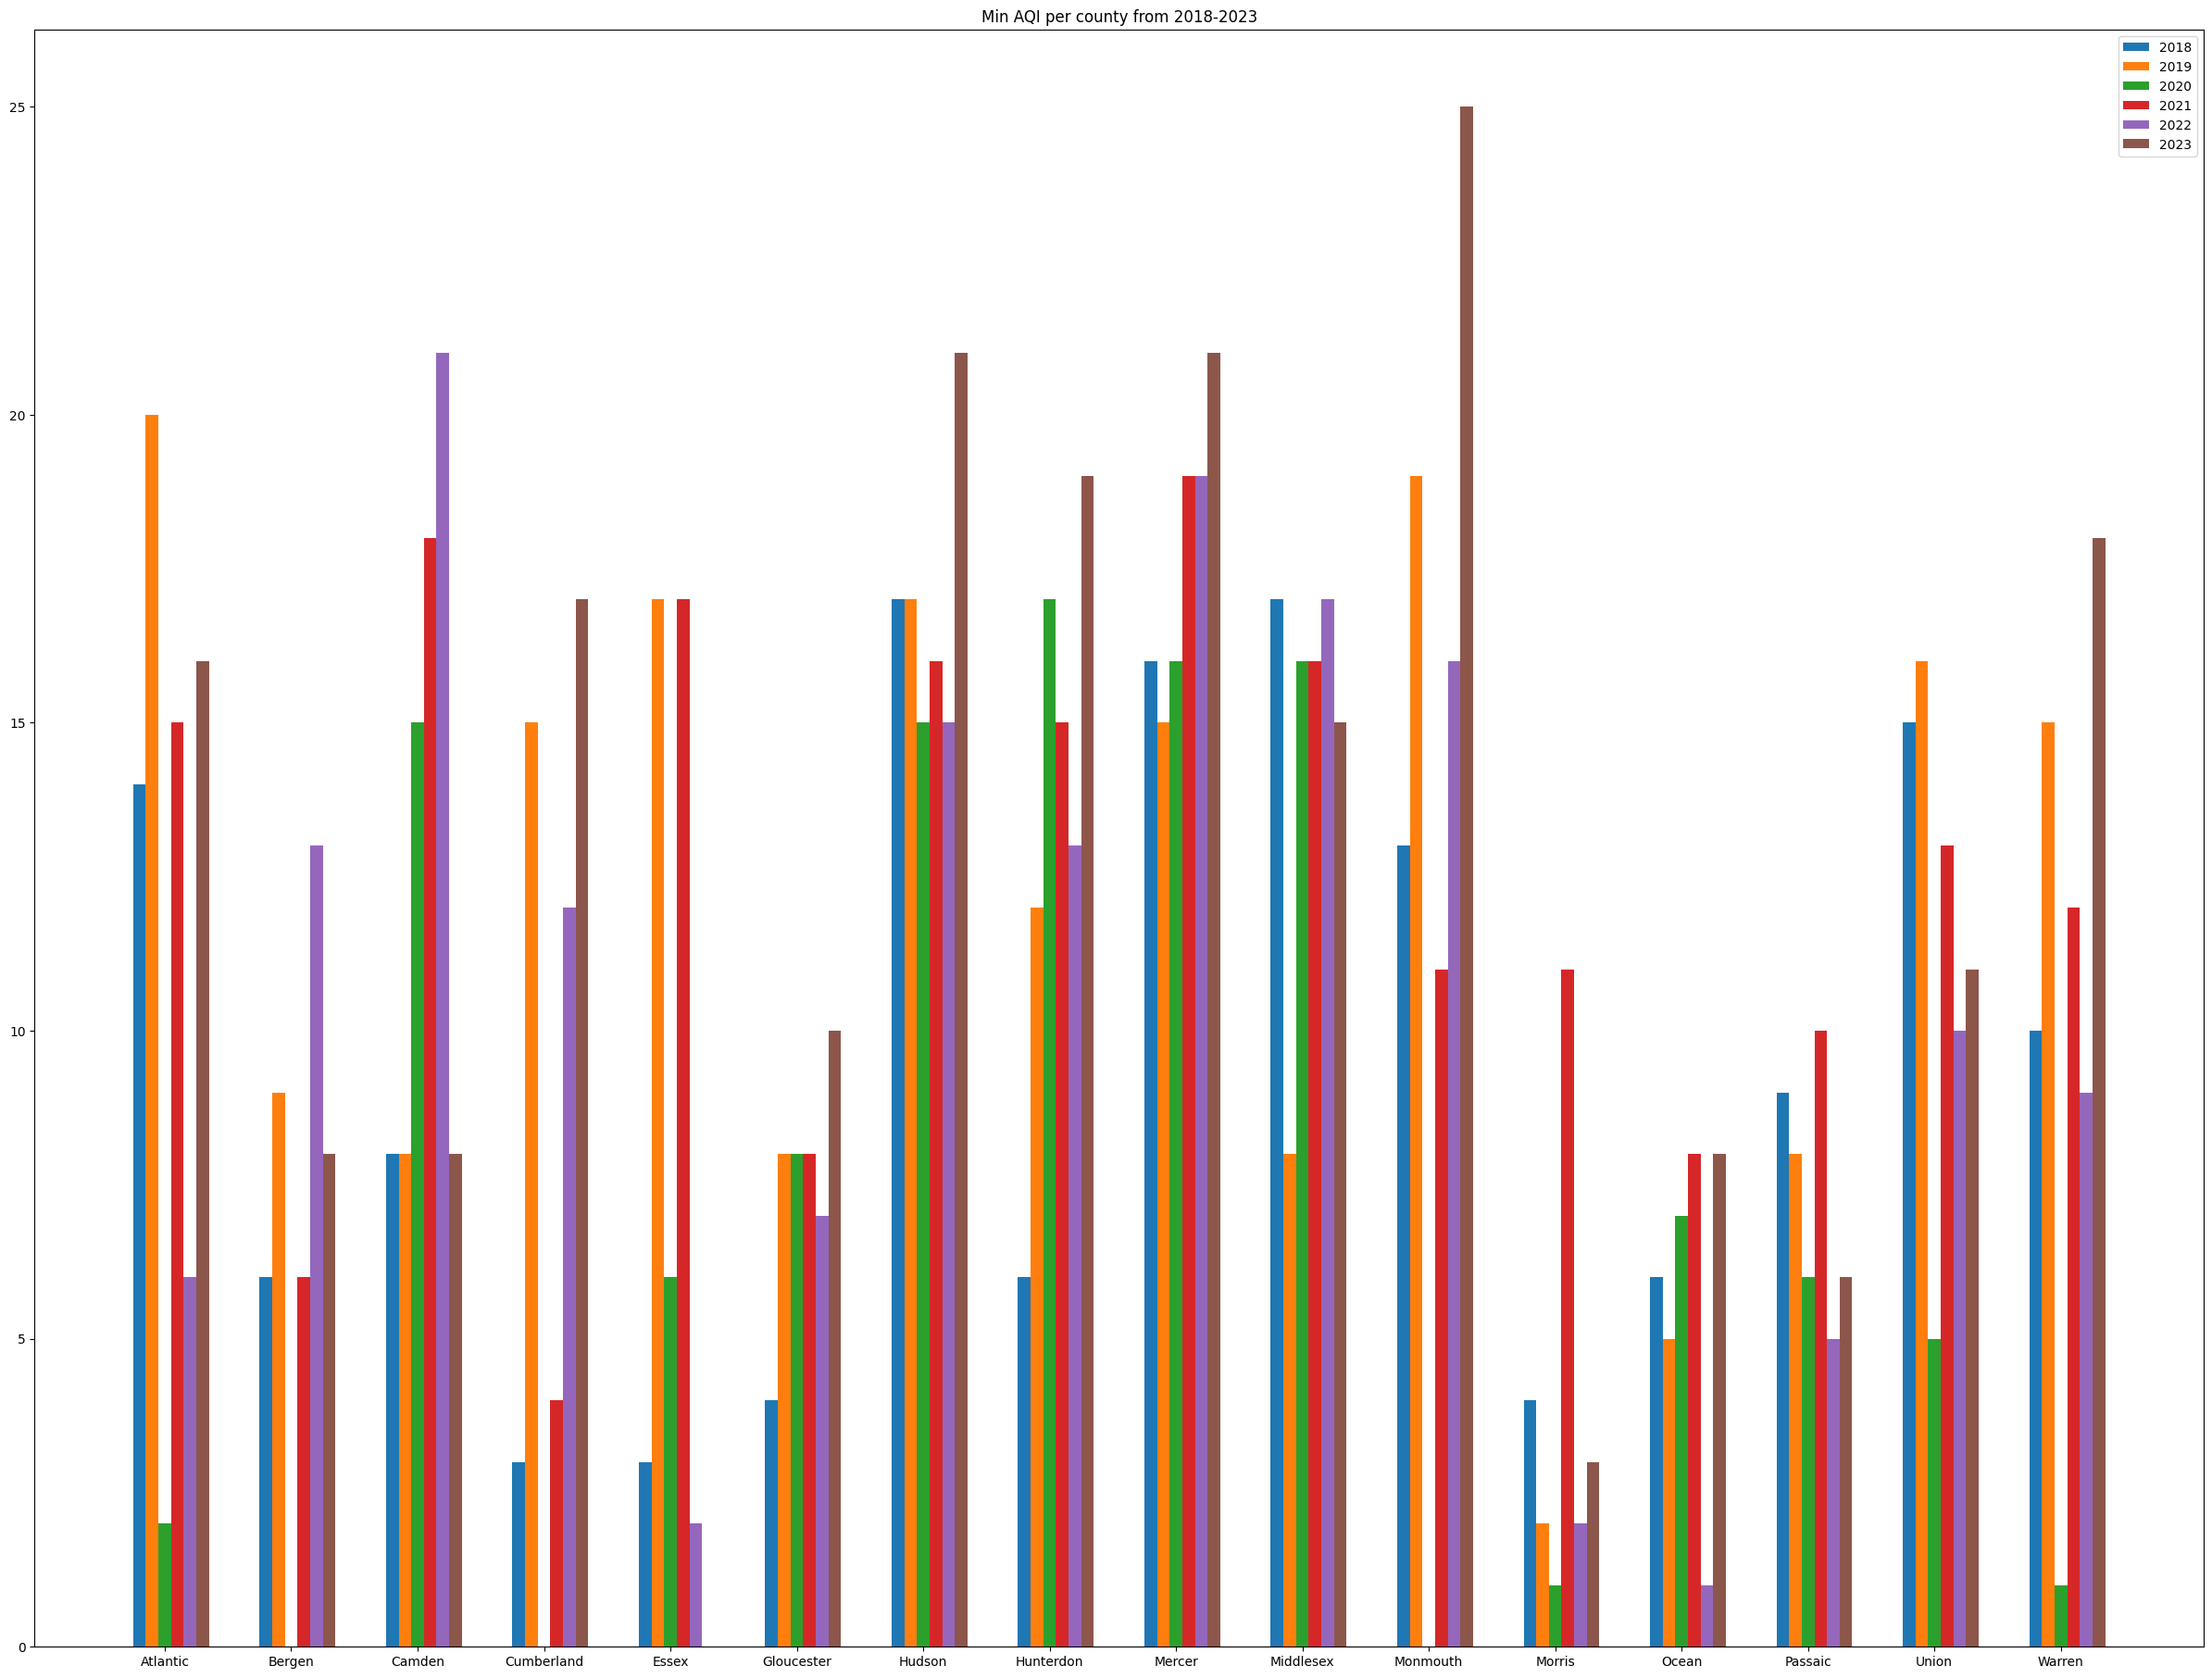

In [54]:
Plotmin()

In [55]:
def multiplot_Min():
        
    width = 0.3
    names = all_mins_df['County'].unique()
    list_names = [name for name in names]
    ind = np.arange(all_mins_df['County'].nunique())
    
    fig = plt.figure(figsize=(24, 20))
    colors = np.random.rand(len(ind),3)
    
    
    plt.subplot(3, 2, 1)
    plt.bar( ind, all_mins_df['AQI_2018'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2018')
    
    plt.subplot(3, 2, 2)
    plt.bar(ind, all_mins_df['AQI_2019'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2019')
    
    plt.subplot(3, 2, 3)
    plt.bar(ind, all_mins_df['AQI_2020'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2020')
    
    plt.subplot(3, 2, 4)
    plt.bar(ind, all_mins_df['AQI_2021'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2021')
    
    plt.subplot(3, 2, 5)
    plt.bar(ind , all_mins_df['AQI_2022'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('min AQI by county in 2022')
    
    plt.subplot(3, 2, 6)
    plt.bar(ind , all_mins_df['AQI_2023'], width, color=colors)
    plt.xticks(ind, list_names, rotation = 'vertical')
    plt.tight_layout()
    plt.title('Min AQI by county in 2023')
    
    plt.savefig('Multiplot_min.png')
    plt.show()
    


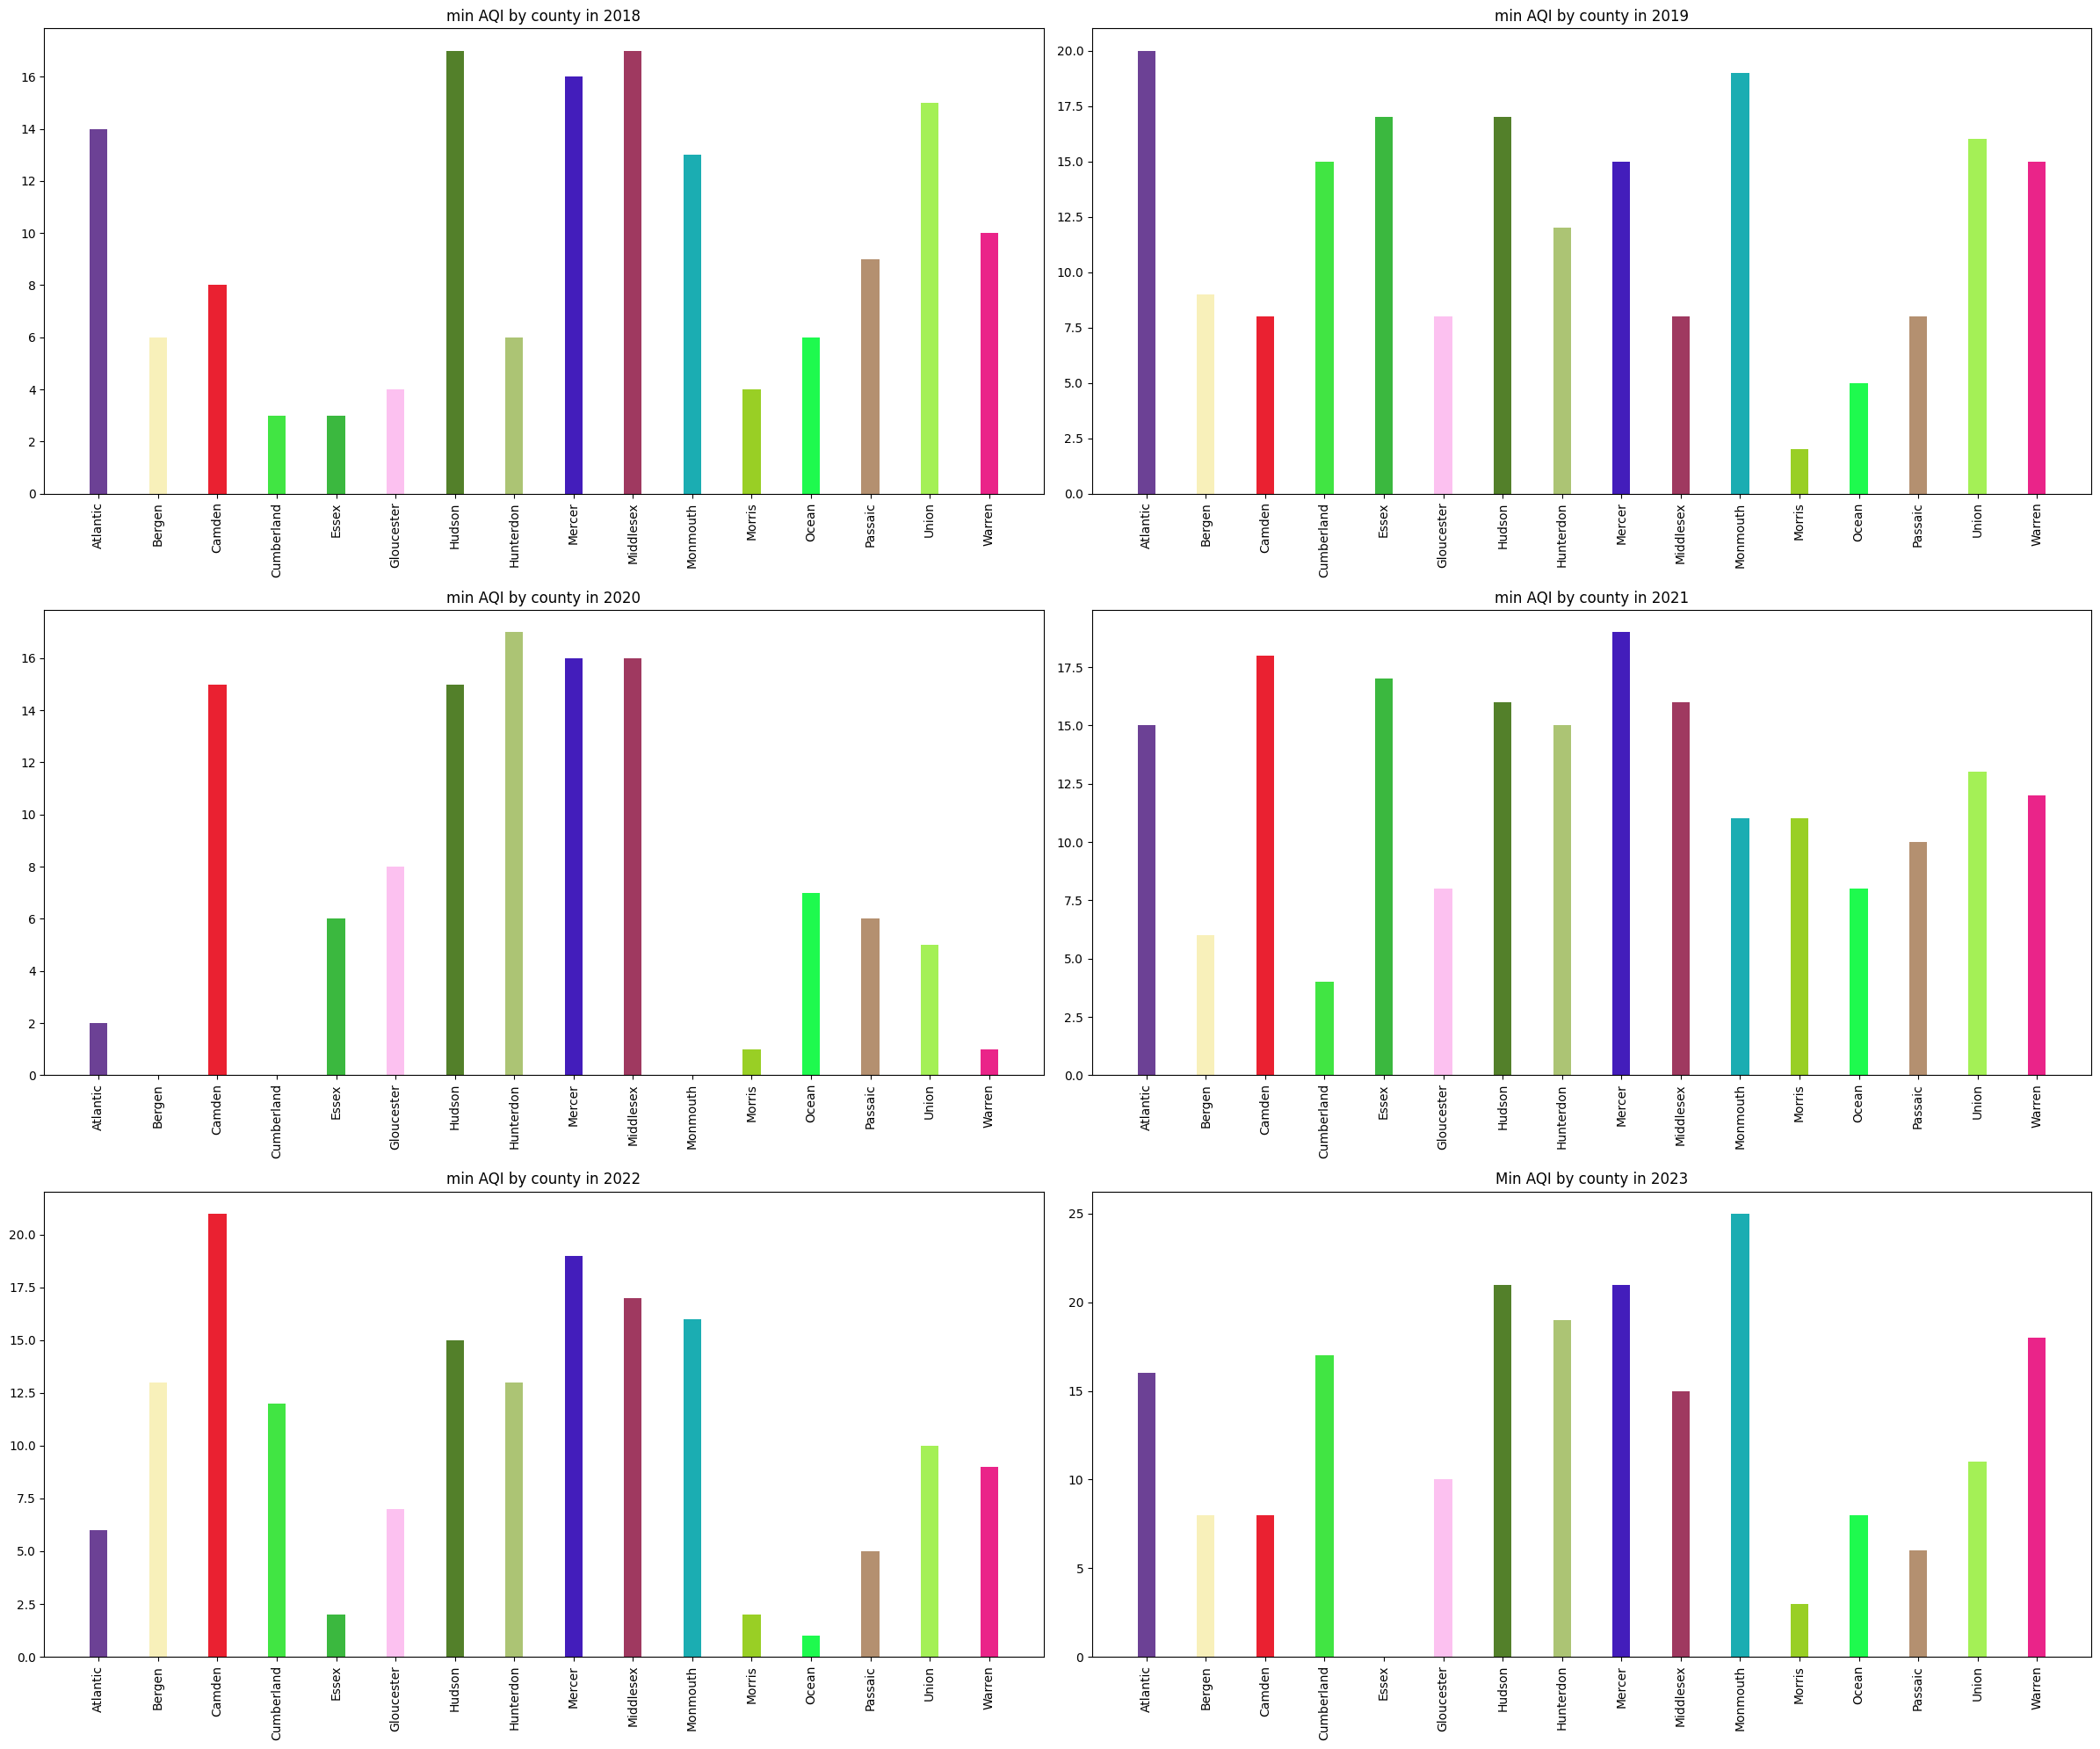

In [56]:
multiplot_Min()

In [57]:
all_mins_df.head()

,Date_2018,County,AQI_2018,Defining Parameter_2018,Date_2019,AQI_2019,Defining Parameter_2019,Date_2020,AQI_2020,Defining Parameter_2020,Date_2021,AQI_2021,Defining Parameter_2021,Date_2022,AQI_2022,Defining Parameter_2022,Date_2023,AQI_2023,Defining Parameter_2023
0,2018-09-12,Atlantic,14,Ozone,2019-11-18,20,Ozone,2020-05-27,2,PM2.5,2021-08-18,15,PM2.5,2022-02-20,6,PM2.5,2023-01-07,16.0,PM2.5
2,2018-02-09,Bergen,6,CO,2019-12-30,9,NO2,2020-12-25,0,CO,2021-07-03,6,PM2.5,2022-01-03,13,NO2,2023-01-14,8.0,NO2
5,2018-11-12,Camden,8,CO,2019-11-13,8,NO2,2020-07-10,15,Ozone,2021-10-23,18,Ozone,2022-05-13,21,Ozone,2023-07-01,8.0,CO
11,2018-09-10,Cumberland,3,NO2,2019-10-29,15,Ozone,2020-09-09,0,Ozone,2021-07-12,4,NO2,2022-02-18,12,PM2.5,2023-01-05,17.0,Ozone
12,2018-10-12,Essex,3,CO,2019-10-09,17,Ozone,2020-12-07,6,CO,2021-09-03,17,Ozone,2022-09-26,2,CO,NaT,NaN,NaN


In [58]:
all_mins_df['AQI_2023']

0     16.0
2      8.0
5      8.0
11    17.0
12     NaN
13    10.0
16    21.0
18    19.0
20    21.0
22    15.0
24    25.0
40     3.0
44     8.0
52     6.0
55    11.0
63    18.0
Name: AQI_2023, dtype: float64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


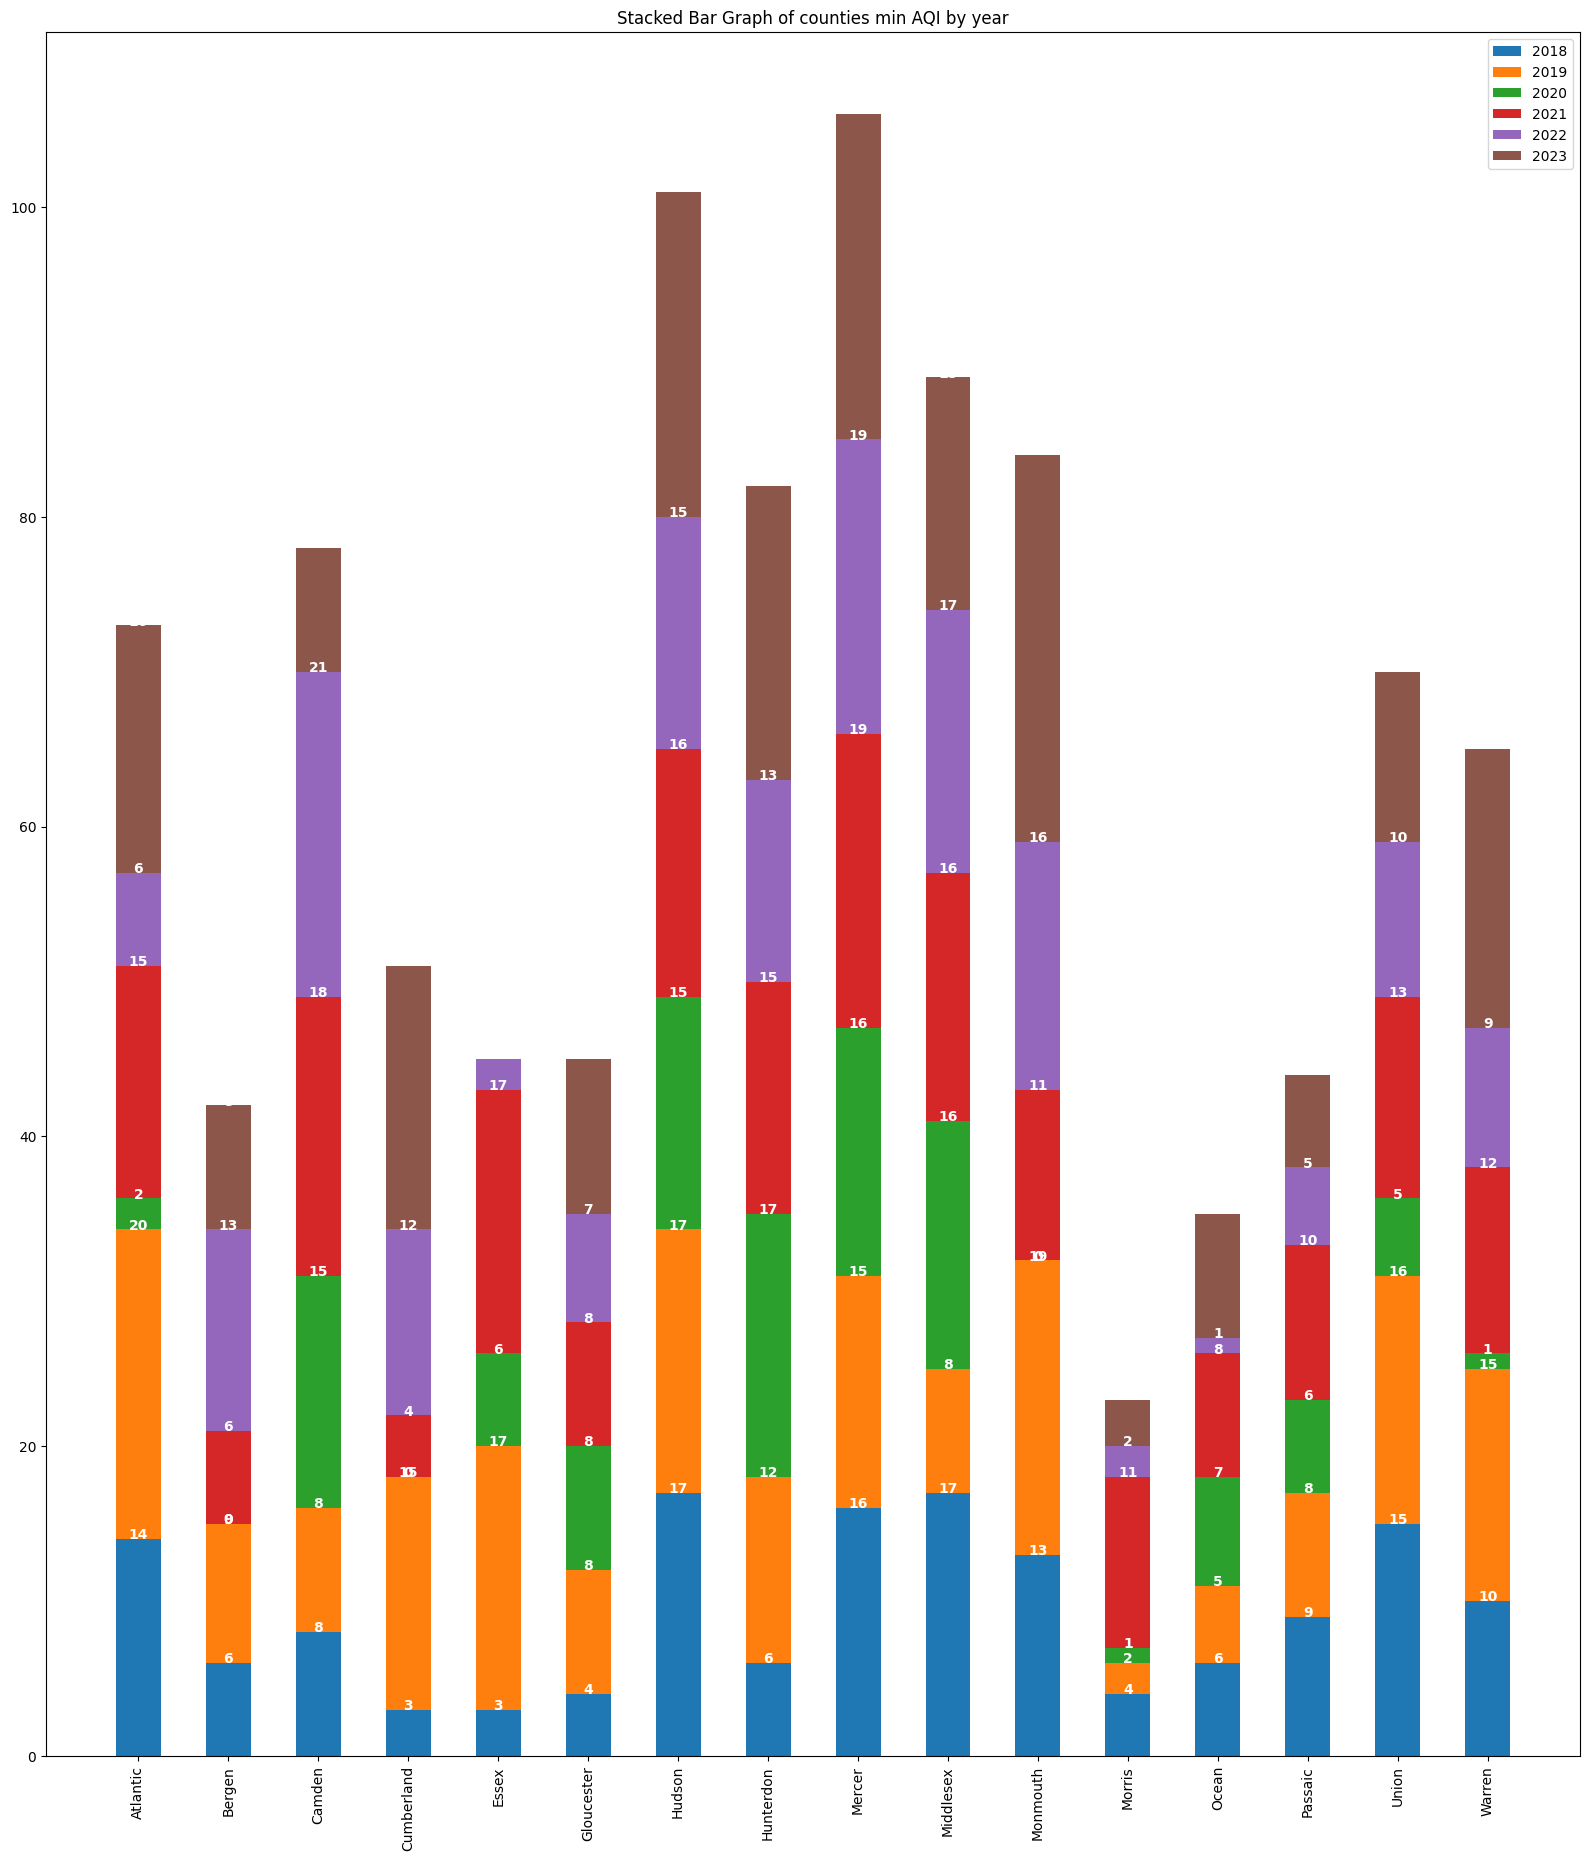

In [59]:
county_names = all_mins_df['County'].unique()
counties = [name for name in county_names]
mins_per_county = {'2018':all_mins_df['AQI_2018'], '2019':all_mins_df['AQI_2019'], '2020':all_mins_df['AQI_2020'],
                    '2021':all_mins_df['AQI_2021'], '2022':all_mins_df['AQI_2022'], '2023':all_mins_df['AQI_2023']}
width = 0.5

fig, ax = plt.subplots(figsize=(16,18))
bottom = np.zeros(16)

for boolean, min in mins_per_county.items():
    ax.bar(counties, min, width, label=boolean, bottom=bottom)
    bottom += min
# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = 5
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  try:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y(),
      round(bar.get_height()),
      ha='center',
      color='w',
      weight='bold',
      size=10
  )
  except ValueError:
      ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset, 0)

plt.title("Stacked Bar Graph of counties min AQI by year")
ax.legend(loc="upper right")
plt.tight_layout()
plt.xticks(rotation = 'vertical')
plt.savefig('stackedBar_min.png')
plt.show()

In [60]:
min_2018_df.head()

,Date_2018,County,AQI_2018,Defining Parameter_2018
0,2018-09-12,Atlantic,14,Ozone
1,2018-02-09,Bergen,6,CO
2,2018-11-12,Camden,8,CO
3,2018-09-10,Cumberland,3,NO2
4,2018-10-12,Essex,3,CO


In [61]:
def min_param_count():
    
    fig = plt.figure(figsize=(16, 12))
    #colors = np.random.rand(len(ind),3)
    
    plt.subplot(3, 2, 1)
    x_axis = min_2018_df['Defining Parameter_2018'].unique()
    list_names = [name for name in x_axis]
    ind = np.arange(min_2018_df['County'].nunique())
    y_axis = min_2018_df['Defining Parameter_2018'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced min AQI by county in 2018')
    
    plt.subplot(3, 2, 2)
    x_axis = min_2019_df['Defining Parameter_2019'].unique()
    list_names = [name for name in x_axis]
    ind = np.arange(min_2019_df['County'].nunique())
    y_axis = min_2019_df['Defining Parameter_2019'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced min AQI by county in 2019')
    
    plt.subplot(3, 2, 3)
    x_axis = min_2020_df['Defining Parameter_2020'].unique()
    list_names = [name for name in x_axis]
    ind = np.arange(min_2020_df['County'].nunique())
    y_axis = min_2020_df['Defining Parameter_2020'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced min AQI by county in 2020')
    
    plt.subplot(3, 2, 4)
    x_axis = min_2021_df['Defining Parameter_2021'].unique()
    list_names = [name for name in x_axis]
    ind = np.arange(min_2021_df['County'].nunique())
    y_axis = min_2021_df['Defining Parameter_2021'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced min AQI by county in 2021')
    
    plt.subplot(3, 2, 5)
    x_axis = min_2022_df['Defining Parameter_2022'].unique()
    list_names = [name for name in x_axis]
    ind = np.arange(min_2022_df['County'].nunique())
    y_axis = min_2022_df['Defining Parameter_2022'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced min AQI by county in 2022')
    
    plt.subplot(3, 2, 6)
    x_axis = min_2023_df['Defining Parameter_2023'].unique()
    list_names = [name for name in x_axis]
    ind = np.arange(min_2023_df['County'].nunique())
    y_axis = min_2023_df['Defining Parameter_2023'].value_counts()
    plt.bar(x_axis, y_axis)
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
                 fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.ylim(0, y_axis.max()+3)
    plt.xticks(x_axis, list_names)
    plt.tight_layout()
    plt.title('Defining Parameter count that produced min AQI by county in 2023')
    plt.savefig('Min_param_count.png',dpi=300, bbox_inches = "tight")
    plt.show()

C:\Users\ambmd\AppData\Local\Temp\ipykernel_24732\4131833204.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center',
C:\Users\ambmd\AppData\Local\Temp\ipykernel_24732\4131833204.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center',
C:\Users\ambmd\AppData\Local\Temp\ipykernel_24732\4131833204.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

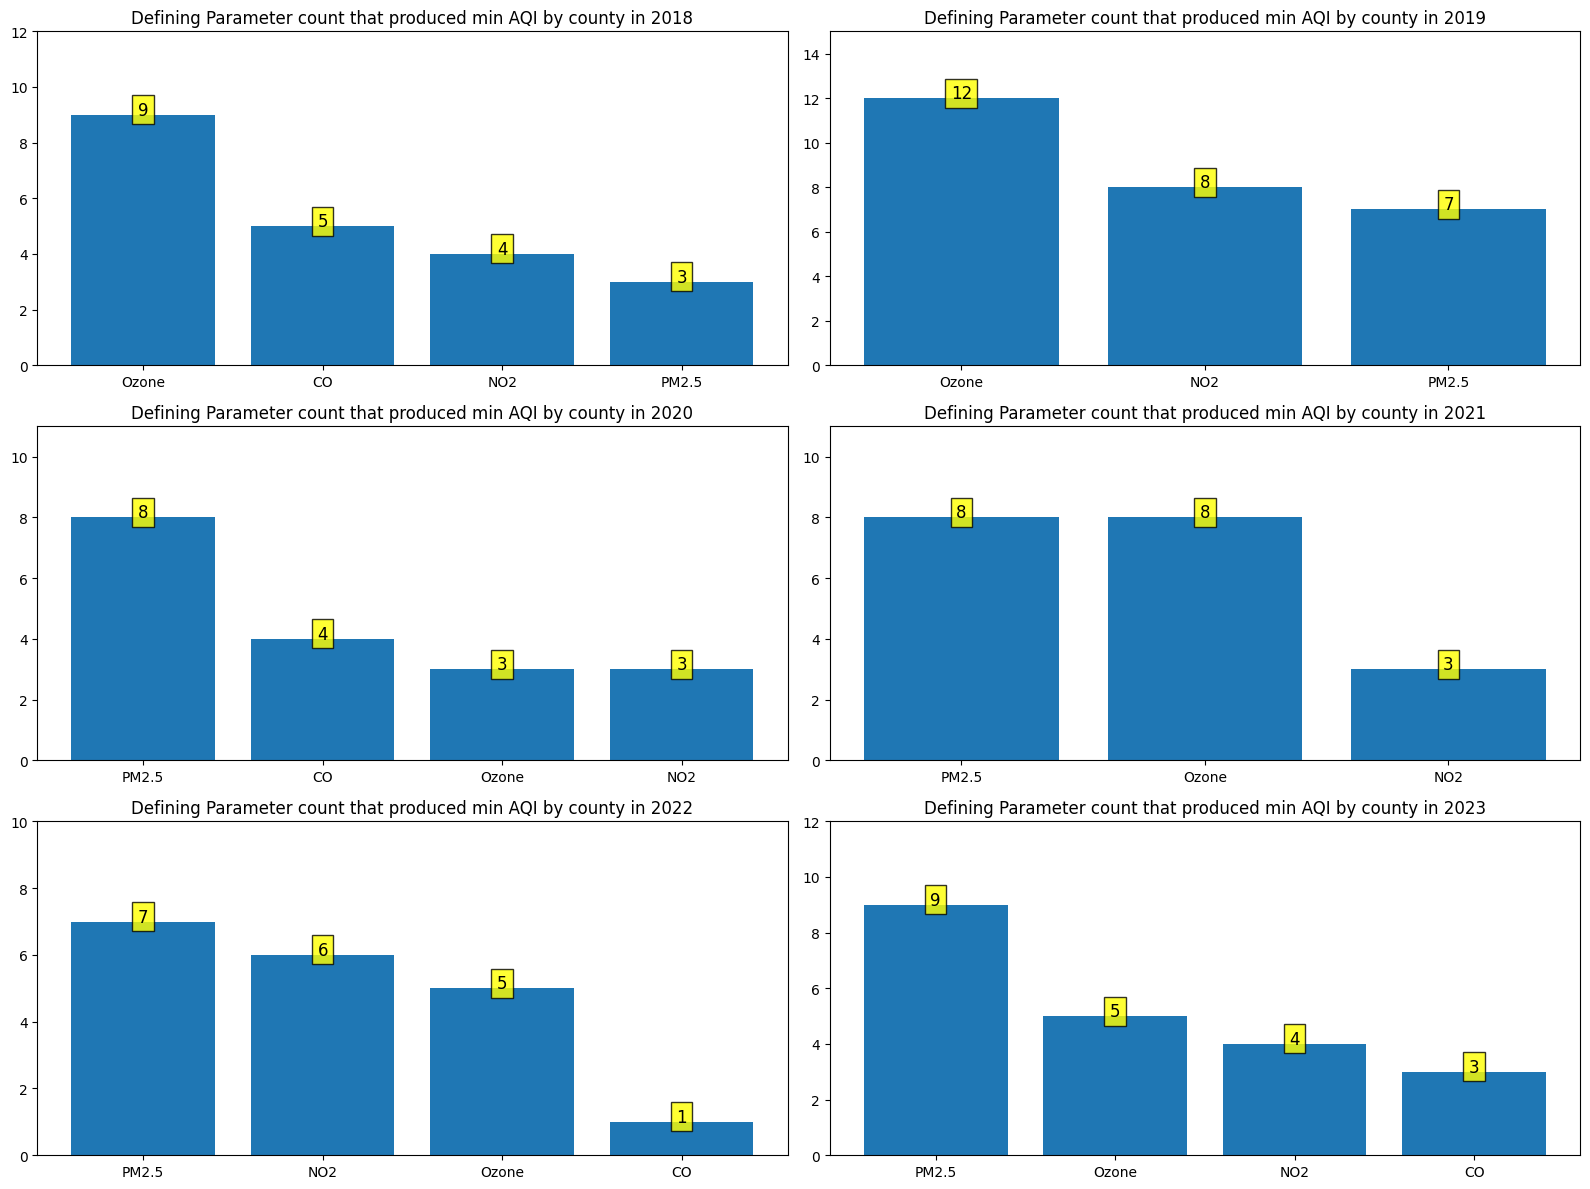

In [62]:
min_param_count()

In [63]:
all_mins_df.shape

(16, 19)

In [64]:
all_maxes_df.shape

(16, 19)

In [65]:
nj_2018_df['Defining Parameter'].unique()

array(['Ozone', 'PM2.5', 'NO2', 'CO'], dtype=object)

<Axes: title={'center': 'AQI'}, xlabel='Defining Parameter'>

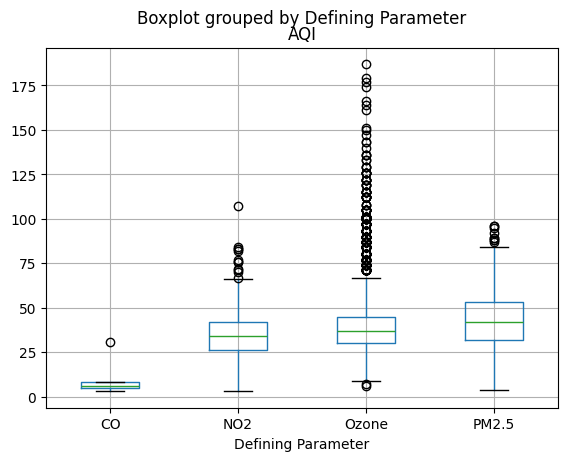

In [66]:
nj_2018_df.boxplot('AQI', by='Defining Parameter')

In [67]:
group0_2018 = nj_2018_df[nj_2018_df["Defining Parameter"] == 'PM2.5']['AQI']
group1_2018 = nj_2018_df[nj_2018_df["Defining Parameter"] == 'Ozone']["AQI"]
group2_2018 = nj_2018_df[nj_2018_df["Defining Parameter"] == 'NO2']["AQI"]
group3_2018 = nj_2018_df[nj_2018_df["Defining Parameter"] == 'CO']["AQI"]

In [68]:
stat = stats.f_oneway(group0_2018, group1_2018, group2_2018, group3_2018)
stat

F_onewayResult(statistic=21.557773517542245, pvalue=7.074015385221451e-14)

In [69]:
nj_2019_df['Defining Parameter'].unique()

array(['PM2.5', 'Ozone', 'NO2'], dtype=object)

<Axes: title={'center': 'AQI'}, xlabel='Defining Parameter'>

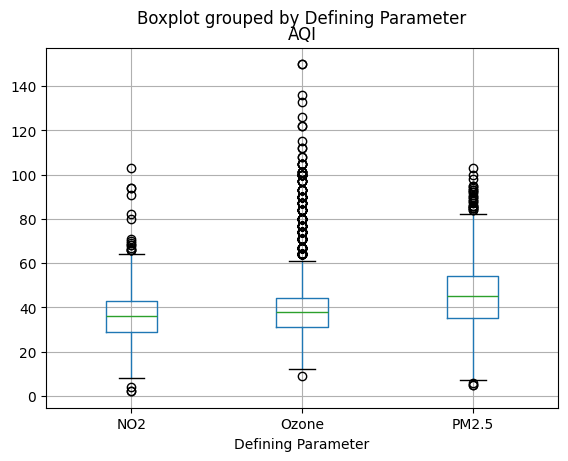

In [70]:
nj_2019_df.boxplot('AQI', by='Defining Parameter')

In [71]:
group0_2019 = nj_2019_df[nj_2019_df["Defining Parameter"] == 'PM2.5']['AQI']
group1_2019 = nj_2019_df[nj_2019_df["Defining Parameter"] == 'Ozone']["AQI"]
group2_2019 = nj_2019_df[nj_2019_df["Defining Parameter"] == 'NO2']["AQI"]

In [72]:
stat = stats.f_oneway(group0_2019, group1_2019, group2_2019)
stat[1]

8.434918472394717e-31

In [73]:
def nj_params_boxplot():
    plt.figure(figsize=(24,24))
    all_nj_df.boxplot('AQI', by='Defining Parameter')
    group0 = all_nj_df[all_nj_df['Defining Parameter'] == 'CO']['AQI']
    group1 = all_nj_df[all_nj_df['Defining Parameter'] == 'NO2']['AQI']
    group2 = all_nj_df[all_nj_df['Defining Parameter'] == 'Ozone']['AQI']
    group3 = all_nj_df[all_nj_df['Defining Parameter'] == 'PM10']['AQI']
    group4 = all_nj_df[all_nj_df['Defining Parameter'] == 'PM2.5']['AQI']
    stat = stats.f_oneway(group0, group1, group2, group3, group4)
    plt.text(1.5, 200, f'{stat[1]} is the p-value',  bbox = dict(facecolor = 'yellow', alpha =.8))
    plt.savefig('box_anova.png',dpi=300, bbox_inches = "tight")

<Figure size 2400x2400 with 0 Axes>

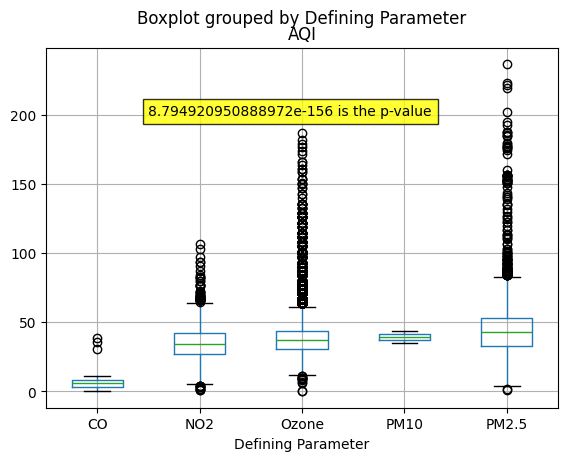

In [74]:
nj_params_boxplot()

In [75]:
group0 = all_nj_df[all_nj_df['Defining Parameter'] == 'CO']['AQI']
group1 = all_nj_df[all_nj_df['Defining Parameter'] == 'NO2']['AQI']
group2 = all_nj_df[all_nj_df['Defining Parameter'] == 'Ozone']['AQI']
group3 = all_nj_df[all_nj_df['Defining Parameter'] == 'PM10']['AQI']
group4 = all_nj_df[all_nj_df['Defining Parameter'] == 'PM2.5']['AQI']

In [76]:
stat = stats.f_oneway(group0, group1, group2, group3, group4)
stat

F_onewayResult(statistic=183.66097251873512, pvalue=8.794920950888972e-156)

C:\Users\ambmd\AppData\Local\Temp\ipykernel_24732\3079480748.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center',


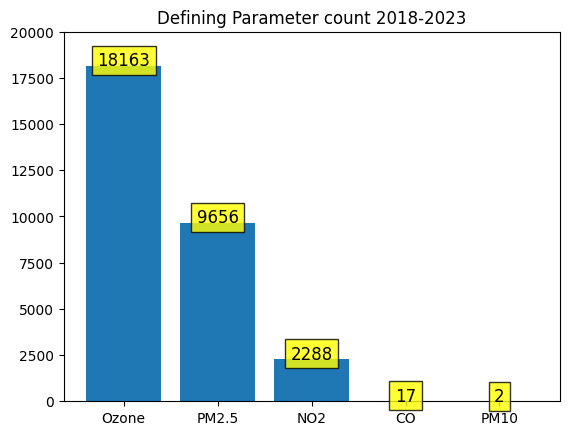

In [77]:
x_axis = all_nj_df['Defining Parameter'].unique()
y_axis = all_nj_df['Defining Parameter'].value_counts()
plt.bar(x_axis, y_axis)
for i in range(len(x_axis)):
    plt.text(i, y_axis[i], f'{y_axis[i]}', ha = 'center', 
             fontsize=12, bbox = dict(facecolor = 'yellow', alpha =.8))
plt.title('Defining Parameter count 2018-2023')
plt.ylim(0, 20000)
plt.savefig('Def_Param.png',dpi=300, bbox_inches = "tight")
plt.show()